# Project 1: SAT & ACT Analysis

## Problem Statement
The college board which administers the SAT’s is looking for recommendations for which state to focus it’s resources on to boost SAT participation rates

## Executive Summary



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Importing and saving csv files
sat_2017_pth = "../data/sat_2017.csv" 
sat_2017= pd.read_csv(sat_2017_pth)
act_2017_pth = "../data/act_2017.csv" 
act_2017= pd.read_csv(act_2017_pth)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Displaying the first 10 rows in  SAT dataframe
sat_2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Displaying the first 10 rows in  ACT dataframe
act_2017.head()


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
Sats_2017:
<br>1.Has a total of 51 entries with 5 columns (state,participation rate,evidence based reading scores,math scores, total) &nbsp;
<br>2.Ordered in alphabatical order by state and not by participation rate
<br>3.Comparing to Act_2017, National State data is missing from data
<br>4.Higher scoring states having lower participation rates
<br>Act_2017:
<br>1.Has a total of 52 entries with 5 columns(state,participation,english,math,reading,science,compostion)
<br><br>2.Ordered in alphabatical order by state and not by participation rate
<br>3.Has entire row 0 on average National participation as well as scores
<br>
<br>
<br>Comparing the two dataframes, states that tend to have lower participation rates in SATs have a much higher <br>participation rates for ACTs.

<br>Comparing between states, states that have a low participation rate, has a higher average total score.

#### 4a. Does the data look complete? 

Answer:
<br><br>1.A column showing if the SAT/ACTs are mandatory in each states.
<br>2.The number of participants is also meeting, giving us only the %of participation, need to know the general    population
<br>3.Im missing the lowest/highest possible score obtainable for each category and total

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
#saving the online sat/act dataframe so tht we can compare
#online_sat_2017_pth = "/Users/ikhyvicky/Desktop/GA_stuff/onlineSATs.csv" 
online_sat_2017_pth = "../data/sat_2017.csv" 
online_sat_2017= pd.read_csv(online_sat_2017_pth)
sat_2017.rename(columns={'Evidence-Based Reading and Writing':'ERW',}, inplace=True)

In [6]:
#online_act_2017_pth = "/Users/ikhyvicky/Desktop/GA_stuff/onlineact.csv" 
online_act_2017_pth = "../data/act_2017.csv" 
online_act_2017= pd.read_csv(online_act_2017_pth)
online_act_2017.head(10)


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
#to group the two dataframes together, and weeeding out the uniques rows, leaving only those with only 1 unique 
df = pd.concat([sat_2017, online_sat_2017])
df = df.reset_index(drop=True) #drops the current index of the DataFrame and replaces it with an index of increasing integers.
df_gpby = df.groupby(list(df.columns))   #group by the columns found indf


f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]

In [9]:
idx

[43,
 39,
 38,
 47,
 40,
 48,
 37,
 46,
 45,
 0,
 41,
 42,
 44,
 91,
 90,
 89,
 88,
 87,
 73,
 74,
 75,
 76,
 77,
 78,
 36,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 80,
 35,
 92,
 8,
 7,
 12,
 9,
 6,
 4,
 10,
 14,
 11,
 33,
 1,
 13,
 2,
 5,
 3,
 99,
 72,
 98,
 22,
 19,
 32,
 30,
 29,
 20,
 21,
 28,
 31,
 26,
 18,
 97,
 94,
 95,
 96,
 93,
 71,
 50,
 69,
 27,
 17,
 16,
 24,
 34,
 25,
 15,
 49,
 23,
 100,
 51,
 52,
 53,
 70,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 55,
 101]

In [10]:
df.reindex(idx)  #comparing the two, we spot the errors between our SAT data an actual source

,ERW,Evidence-Based Reading and Writing,Math,Participation,State,Total
43,513.0,NaN,507,62%,Texas,1020
39,539.0,NaN,524,71%,Rhode Island,1062
38,540.0,NaN,531,65%,Pennsylvania,1071
47,541.0,NaN,534,64%,Washington,1075
40,543.0,NaN,521,50%,South Carolina,1064
...,...,...,...,...,...,...
66,NaN,641.0,635,2%,Iowa,1275
67,NaN,632.0,628,4%,Kansas,1260
68,NaN,631.0,616,4%,Kentucky,1247
55,NaN,531.0,524,53%,California,1055


Answer:
1. We can see in our SAT data has an error in the MATH column. Value has to be 524 instead of 52
2. Out SAT data is missing the values for National Average , but we may not need this for our analysis.

In [11]:
act_2017.head()
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [12]:
online_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

From here can see datatypes for composite different! We need to make them the same before concanating

In [13]:
#changing the datatypes so that the concanating process can be done
online_act_2017['Composite'] = online_act_2017['Composite'].astype(str)
online_act_2017['State'] = online_act_2017['State'].astype(str)
online_act_2017['Participation'] = online_act_2017['Participation'].astype(str)

act_2017['Composite'] = act_2017['Composite'].astype(str)
act_2017['State'] = act_2017['State'].astype(str)
act_2017['Participation'] =act_2017['Participation'].astype(str)


In [14]:
dy=pd.concat([act_2017,online_act_2017])

In [15]:
dy=dy.reset_index(drop=True)#drops the current index of the DataFrame and replaces it with an index of increasing integers.

In [16]:
dy_gpby = dy.groupby(list(dy.columns))   #group by the columns found in dy

In [17]:
idy = [x[0] for x in dy_gpby.groups.values() if len(x) == 1]

In [18]:
idy

[]

In [19]:
dy.reindex(idy)

,State,Participation,English,Math,Reading,Science,Composite


From comparing our ACT data and the source data:
1. The value of Science in Maryland is supposed to be 23.2
2. The Composite Value in Wyoming has an extra x which needs to be removed.
3. The Values in state National looks to be the same, which suggests that the data type found in our ACT data is   
   different from the source, we might need to change them for our analysis.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [20]:
#code
#in SAT data,MATH column. Value has to be 524 instead of 52
sat_2017.at[20, 'Math'] = 524
sat_2017.loc[20,'Math']

524

In [21]:
#The value of Science in Maryland is supposed to be 23.2
#The Composite Value in Wyoming has an extra x which needs to be removed.
act_2017.at[21, 'Science'] = 23.2
act_2017.at[51, 'Composite'] = 20.2
print(act_2017.loc[21,'Science'])
print(act_2017.loc[51,'Composite'])

23.2
20.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [22]:
#code
print(sat_2017.dtypes)
sat_2017.head()

State            object
Participation    object
ERW               int64
Math              int64
Total             int64
dtype: object


,State,Participation,ERW,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [23]:
print(act_2017.dtypes)
act_2017.head()

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
SAT
<br>1.The datatype for State is an object, which suggests there are more then just strings in the State column. Datatype should be purely strings
<br>2.Participation datatype is also object. That is because of the numeral and % character combined. Need to be float datatype in order to be further used.


ACT
1.The datatype for State is an object, which suggests there are more then just strings in the State column. Datatype should be purely strings
2.Participation datatype is also object. That is because of the numeral and % character combined. Need to be float datatype in order to be further used.
3.The composite column is of object type. We need the datatype to be float in order to be further used.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [24]:
#code
#function removes the %symbol
#function iterates through each row in the participation rates column
#convert whole number to percentage ie number*0.01
def convert_to_dec(x):
    x= x.replace("%","")
    x=float(x)/100
    return x

In [25]:
sat_2017['Participation']=sat_2017['Participation'].apply(convert_to_dec)



In [26]:
sat_2017.head()

,State,Participation,ERW,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [27]:
act_2017['Participation']=act_2017['Participation'].apply(convert_to_dec)

In [28]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [29]:
#ACT composite column is of object type. We need the datatype to be float in order to be further used
#see which items in column causing the problems
act_2017.Composite.unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', 20.2], dtype=object)

In [30]:
#notice all except one of the data type is str. Need to convert them to float
def str_to_float(x):
    x=float(x)
    return x

In [31]:
act_2017['Composite']=act_2017['Composite'].apply(str_to_float)

In [32]:
sat_2017.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [33]:
sat_2017.dtypes

State             object
Participation    float64
ERW                int64
Math               int64
Total              int64
dtype: object

- Display the data types again to confirm they are correct.

In [34]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [35]:
# 2018 ACT columns are [State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score]
#use this new list and change column names
new_ACT_column_list=['State','%_Students_Tested_ACT_2017','Average_Composite_Score_2017','Average_English_Score_2017','Average_Math_Score_2017','Average_Reading_Score_2017','Average_Science_Score_2017']
new_ACT_column_list=[x.lower() for x in new_ACT_column_list]
new_ACT_column_list

['state',
 '%_students_tested_act_2017',
 'average_composite_score_2017',
 'average_english_score_2017',
 'average_math_score_2017',
 'average_reading_score_2017',
 'average_science_score_2017']

In [36]:
act_2017.columns=new_ACT_column_list

In [37]:
act_2017.columns

Index(['state', '%_students_tested_act_2017', 'average_composite_score_2017',
       'average_english_score_2017', 'average_math_score_2017',
       'average_reading_score_2017', 'average_science_score_2017'],
      dtype='object')

In [38]:
#2018 SAT columns are [State,Participation,Evidence-Based Reading and Writing,Math,Total]
#use this new list and change column names
new_SAT_column_list=['State','%_Students_Tested_SAT_2017','Evidence-Based_Reading_and_Writing_2017','Math_2017','Total_2017']
new_SAT_column_list=[x.lower() for x in new_SAT_column_list]
new_SAT_column_list

['state',
 '%_students_tested_sat_2017',
 'evidence-based_reading_and_writing_2017',
 'math_2017',
 'total_2017']

In [39]:
sat_2017.columns=new_SAT_column_list

In [40]:
sat_2017.columns

Index(['state', '%_students_tested_sat_2017',
       'evidence-based_reading_and_writing_2017', 'math_2017', 'total_2017'],
      dtype='object')

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [41]:
#the national row in ACT is not needed for our analysis
act_2017=act_2017.drop(act_2017.index[0])
act_2017.head()

,state,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,average_science_score_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [42]:
#merge the two dataframes together to create one combined 
combined_2017=pd.merge(left=sat_2017,right=act_2017,on="state",how="outer")

In [43]:
combined_2017.dtypes

state                                       object
%_students_tested_sat_2017                 float64
evidence-based_reading_and_writing_2017      int64
math_2017                                    int64
total_2017                                   int64
%_students_tested_act_2017                 float64
average_composite_score_2017               float64
average_english_score_2017                 float64
average_math_score_2017                    float64
average_reading_score_2017                 float64
average_science_score_2017                 float64
dtype: object

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [44]:
#saving to folder
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [45]:
sat_2018_pth = "../data/sat2018new.csv" 
sat_2018= pd.read_csv(sat_2018_pth)


In [46]:
act_2018_pth = "../data/act_2018_updated.csv" 
act_2018= pd.read_csv(act_2018_pth)

In [47]:
sat_2018.head()

,State,ERW*,Mathematics,Total,Taking SAT
0,Alabama,595,571,1166,6
1,Alaska,562,544,1106,43
2,Arizona,577,572,1149,29
3,Arkansas,592,576,1169,5
4,California,540,536,1076,60


In [48]:
#convert %_students_tested_act_2018 to float and deciamal percentage value
def convert_to_float(x):
    x=float(x)/100
    return x

In [49]:
#convert participation rates to float
sat_2018['Taking SAT']=sat_2018['Taking SAT'].apply(convert_to_float)

In [50]:
#change the coloumn names for SAT
new_SAT2_column_list=['State','Evidence-Based_Reading_and_Writing_2018','Math_2018','Total_2018','%_Students_Tested_SAT_2018']
new_SAT2_column_list=[x.lower() for x in new_SAT2_column_list]


In [51]:
sat_2018.columns=new_SAT2_column_list

In [52]:
sat_2018.head()

,state,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018
0,Alabama,595,571,1166,0.06
1,Alaska,562,544,1106,0.43
2,Arizona,577,572,1149,0.29
3,Arkansas,592,576,1169,0.05
4,California,540,536,1076,0.60


In [53]:
#convert the column names first
new_ACT1_column_list=['State','%_Students_Tested_ACT_2018','Average_Composite_Score_2018','Average_English_Score_2018','Average_Math_Score_2018','Average_Reading_Score_2018','Average_Science_Score_2018']
new_ACT1_column_list=[x.lower() for x in new_ACT1_column_list]
new_ACT1_column_list

['state',
 '%_students_tested_act_2018',
 'average_composite_score_2018',
 'average_english_score_2018',
 'average_math_score_2018',
 'average_reading_score_2018',
 'average_science_score_2018']

In [54]:
act_2018.columns=new_ACT1_column_list

In [55]:
act_2018.dtypes

state                            object
%_students_tested_act_2018        int64
average_composite_score_2018    float64
average_english_score_2018      float64
average_math_score_2018         float64
average_reading_score_2018      float64
average_science_score_2018      float64
dtype: object

In [56]:
act_2018['%_students_tested_act_2018']=act_2018['%_students_tested_act_2018'].apply(convert_to_float)

In [57]:
#combine the 2018 act and sat soon
combined_2018=pd.merge(left=sat_2018,right=act_2018,on="state",how="outer")

In [58]:
#save combined_2018 to csv
combined_2018.to_csv("../data/combined_2018.csv")

In [59]:
combined_2018.head()

,state,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
0,Alabama,595,571,1166,0.06,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,562,544,1106,0.43,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,577,572,1149,0.29,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,592,576,1169,0.05,1.00,19.4,19.1,18.9,19.7,19.4
4,California,540,536,1076,0.60,0.27,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [60]:
final=pd.merge(left=combined_2017,right=combined_2018,on='state',how="outer")

In [61]:
final.head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,595,571,1166,0.06,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,562,544,1106,0.43,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,577,572,1149,0.29,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,592,576,1169,0.05,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,540,536,1076,0.60,0.27,22.7,22.5,22.5,23.0,22.1


In [62]:
final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
final.describe()

,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,average_science_score_2017,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,567.294118,557.254902,1124.666667,0.466275,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,45.317676,48.887562,93.868561,0.380142,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,497.000000,480.000000,977.000000,0.020000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,535.000000,521.500000,1062.500000,0.045000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,552.000000,547.000000,1099.000000,0.520000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,616.500000,600.500000,1220.000000,0.795000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,643.000000,655.000000,1298.000000,1.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
#need to first find the mean of the values in each column 𝜇
#initial counter = 0 ....... += (x-𝜇)^2 for each iteration of x
#divide by n number of entries and then finally square root
def standard_deviation(x):
    n=0
    total=0
    for i in x:
        total+=i
        n+=1
    mean=total/n
    summation=0
    for i in x:
        summation+=(i-mean)**2
    sd=(summation/n)**0.5
    return sd

In [65]:
df2=final.loc[:, final.columns != 'state'].apply(standard_deviation)

In [66]:
type(df2)

pandas.core.series.Series

In [67]:
df2.shape

(20,)

In [68]:
df2.head()       #df2 is a core series, its a list of the sd we have calculated, the column names become the index

%_students_tested_sat_2017                  0.349291
evidence-based_reading_and_writing_2017    45.216970
math_2017                                  46.657134
total_2017                                 91.583511
%_students_tested_act_2017                  0.318242
dtype: float64

In [69]:
df2.dtypes

dtype('float64')

In [70]:
ziplock = zip(df2.index,df2)
sf=dict(ziplock)
sf

{'%_students_tested_sat_2017': 0.3492907076664507,
 'evidence-based_reading_and_writing_2017': 45.21697020437866,
 'math_2017': 46.65713364485503,
 'total_2017': 91.58351056778743,
 '%_students_tested_act_2017': 0.3182417575123181,
 'average_composite_score_2017': 2.3304876369363363,
 'average_english_score_2017': 1.9624620273436781,
 'average_math_score_2017': 2.0469029314842646,
 'average_reading_score_2017': 1.7222161451443676,
 'average_science_score_2017': 2.000786081581989,
 'evidence-based_reading_and_writing_2018': 44.87118561762388,
 'math_2018': 48.40589946919447,
 'total_2018': 92.94372462792965,
 '%_students_tested_sat_2018': 0.3763965409204987,
 '%_students_tested_act_2018': 0.33745194881997503,
 'average_composite_score_2018': 2.0855261815801147,
 'average_english_score_2018': 2.4222536143202795,
 'average_math_score_2018': 2.015707255555717,
 'average_reading_score_2018': 2.145891884510421,
 'average_science_score_2018': 1.8516885484833543}

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer
There is a slight variation between the output, np.std methid and the dataframe.describe methods

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## SAT Participation Rates 2017##
The top 5 states with the highest percentage rate
<br>1.District of Colombia 1
<br>2.Michigan      1
<br>3.Connecticut   1
<br>4.Delaware      1
<br>5.New Hampshire 0.96
<br>The bottom 5 states with the highest percentage rate
<br>1.Arkansas 0.03
<br>2.Wyoming  0.03
<br>3.North Dakota 0.02
<br>4.Mississippi  0.02
<br>5.Iowa      0.02

In [71]:
final.sort_values(by='%_students_tested_sat_2017', ascending=False).head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,497,480,977,0.92,0.32,23.6,23.7,22.7,24.4,23.0
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,511,499,1011,1.00,0.22,24.4,24.5,23.9,24.7,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,535,519,1053,1.00,0.26,25.6,26.0,24.8,26.1,24.9
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,505,492,998,1.00,0.17,23.2,23.7,23.1,24.5,23.4
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,535,528,1063,0.96,0.16,25.1,25.1,24.7,25.6,24.4


In [72]:
final.sort_values(by='%_students_tested_sat_2017', ascending=False).tail()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,592,576,1169,0.05,1.00,19.4,19.1,18.9,19.7,19.4
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,...,633,625,1257,0.03,1.00,20.0,19.0,19.7,20.6,20.3
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,640,643,1283,0.02,0.98,20.3,19.1,20.3,20.7,20.5
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,...,630,606,1236,0.03,1.00,18.6,18.2,18.1,18.9,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,634,631,1265,0.03,0.68,21.8,21.0,21.2,22.5,22.0


## SAT Participation Rates 2018##
The top 5 states with the highest percentage rate
<br>1.Colorado      1
<br>2.Connecticut   1
<br>3.Delaware      1
<br>4.Michigan      1
<br>5.Idaho         1
<br>The bottom 5 states with the lowest percentage rate
<br>1.Mississippi       0.03
<br>2.Iowa              0.03
<br>3.Wisconsin         0.03
<br>4.Wyoming           0.03
<br>5.North Dakota      0.02

In [73]:
final.sort_values(by='%_students_tested_sat_2018', ascending=False).head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,519,506,1025,1.0,0.30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,535,519,1053,1.0,0.26,25.6,26.0,24.8,26.1,24.9
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,505,492,998,1.0,0.17,23.2,23.7,23.1,24.5,23.4
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,511,499,1011,1.0,0.22,24.4,24.5,23.9,24.7,23.9
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,...,508,493,1001,1.0,0.36,22.3,21.9,21.6,23.2,22.1


In [74]:
final.sort_values(by='%_students_tested_sat_2018', ascending=False).tail()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,...,630,606,1236,0.03,1.00,18.6,18.2,18.1,18.9,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,634,631,1265,0.03,0.68,21.8,21.0,21.2,22.5,22.0
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,...,641,653,1294,0.03,1.00,20.5,19.8,20.3,20.6,20.8
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,...,633,625,1257,0.03,1.00,20.0,19.0,19.7,20.6,20.3
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,640,643,1283,0.02,0.98,20.3,19.1,20.3,20.7,20.5


## SAT Total Scores 2017##
The top 5 states with the highest percentage rate
<br>1.Minnesota    1295
<br>2.Wisconsin    1291
<br>3.Iowa         1275
<br>4.Missouri     1271
<br>5.Kansas       1260
<br>The bottom 5 states with the highest percentage rate
<br>1.Michigan      1005
<br>2.Idaho         1005
<br>3.West Virginia 1086
<br>4.Delaware      996
<br>5.District of   995
<br>Columbia    

In [75]:
final.sort_values(by='total_2017', ascending=False).head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,...,643,655,1298,0.04,0.99,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,...,641,653,1294,0.03,1.00,20.5,19.8,20.3,20.6,20.8
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,634,631,1265,0.03,0.68,21.8,21.0,21.2,22.5,22.0
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,...,633,629,1262,0.04,1.00,20.0,19.5,19.7,20.5,20.0
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,...,633,631,1265,0.04,0.71,21.6,21.0,21.1,22.3,21.5


In [76]:
final.sort_values(by='total_2018', ascending=False).tail()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,511,499,1011,1.00,0.22,24.4,24.5,23.9,24.7,23.9
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,...,508,493,1001,1.00,0.36,22.3,21.9,21.6,23.2,22.1
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,...,513,486,999,0.28,0.65,20.3,19.8,19.4,21.3,20.4
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,505,492,998,1.00,0.17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,497,480,977,0.92,0.32,23.6,23.7,22.7,24.4,23.0


## ACT Participation Rates 2017##
The top 5 states with the highest percentage rate
<br>1.Alabama    1
<br>2.Kentucky   1
<br>3.Wisconsin  1
<br>4.Utah       1
<br>5.Tennessee  1
<br>The bottom 5 states with the lowest percentage rate
<br>1.Pennsylvania       0.23
<br>2.Rhode Island	     0.21
<br>3.Delaware           0.18
<br>4.New Hampshire      0.18
<br>5.Maine              0.02

In [77]:
final.sort_values(by='%_students_tested_act_2017', ascending=False).head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,...,595,571,1166,0.06,1.0,19.1,18.9,18.3,19.6,19.0
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,...,630,618,1248,0.04,1.0,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,...,641,653,1294,0.03,1.0,20.5,19.8,20.3,20.6,20.8
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,...,618,612,1230,0.04,1.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,...,624,607,1231,0.06,1.0,19.6,19.4,19.1,19.9,19.6


In [78]:
final.sort_values(by='%_students_tested_act_2017', ascending=False).tail()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,...,547,539,1086,0.70,0.20,23.5,23.3,23.2,24.0,23.1
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,513,505,1018,0.97,0.15,24.2,24.4,23.6,25.0,23.5
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,505,492,998,1.00,0.17,23.2,23.7,23.1,24.5,23.4
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,535,528,1063,0.96,0.16,25.1,25.1,24.7,25.6,24.4
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,512,501,1013,0.99,0.07,24.0,23.8,23.6,24.7,23.4


## ACT Participation Rates 2018##
The top 5 states with the highest percentage rate
<br>1.Alabama    1
<br>2.Kentucky   1
<br>3.Wisconsin  1
<br>4.Utah       1
<br>5.Tennessee  1
<br>The bottom 5 states with the lowest percentage rate
<br>1.Pennsylvania       0.20
<br>2.Delaware	         0.17
<br>3.New Hampshire      0.16
<br>4.Rhode Island       0.15
<br>5.Maine              0.07

In [79]:
final.sort_values(by='%_students_tested_act_2018', ascending=False).head()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,...,595,571,1166,0.06,1.0,19.1,18.9,18.3,19.6,19.0
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,...,630,618,1248,0.04,1.0,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,...,641,653,1294,0.03,1.0,20.5,19.8,20.3,20.6,20.8
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,...,618,612,1230,0.04,1.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,...,624,607,1231,0.06,1.0,19.6,19.4,19.1,19.9,19.6


In [80]:
final.sort_values(by='%_students_tested_act_2018', ascending=False).tail()

,state,%_students_tested_sat_2017,evidence-based_reading_and_writing_2017,math_2017,total_2017,%_students_tested_act_2017,average_composite_score_2017,average_english_score_2017,average_math_score_2017,average_reading_score_2017,...,evidence-based_reading_and_writing_2018,math_2018,total_2018,%_students_tested_sat_2018,%_students_tested_act_2018,average_composite_score_2018,average_english_score_2018,average_math_score_2018,average_reading_score_2018,average_science_score_2018
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,...,547,539,1086,0.70,0.20,23.5,23.3,23.2,24.0,23.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,505,492,998,1.00,0.17,23.2,23.7,23.1,24.5,23.4
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,535,528,1063,0.96,0.16,25.1,25.1,24.7,25.6,24.4
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,513,505,1018,0.97,0.15,24.2,24.4,23.6,25.0,23.5
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,512,501,1013,0.99,0.07,24.0,23.8,23.6,24.7,23.4


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

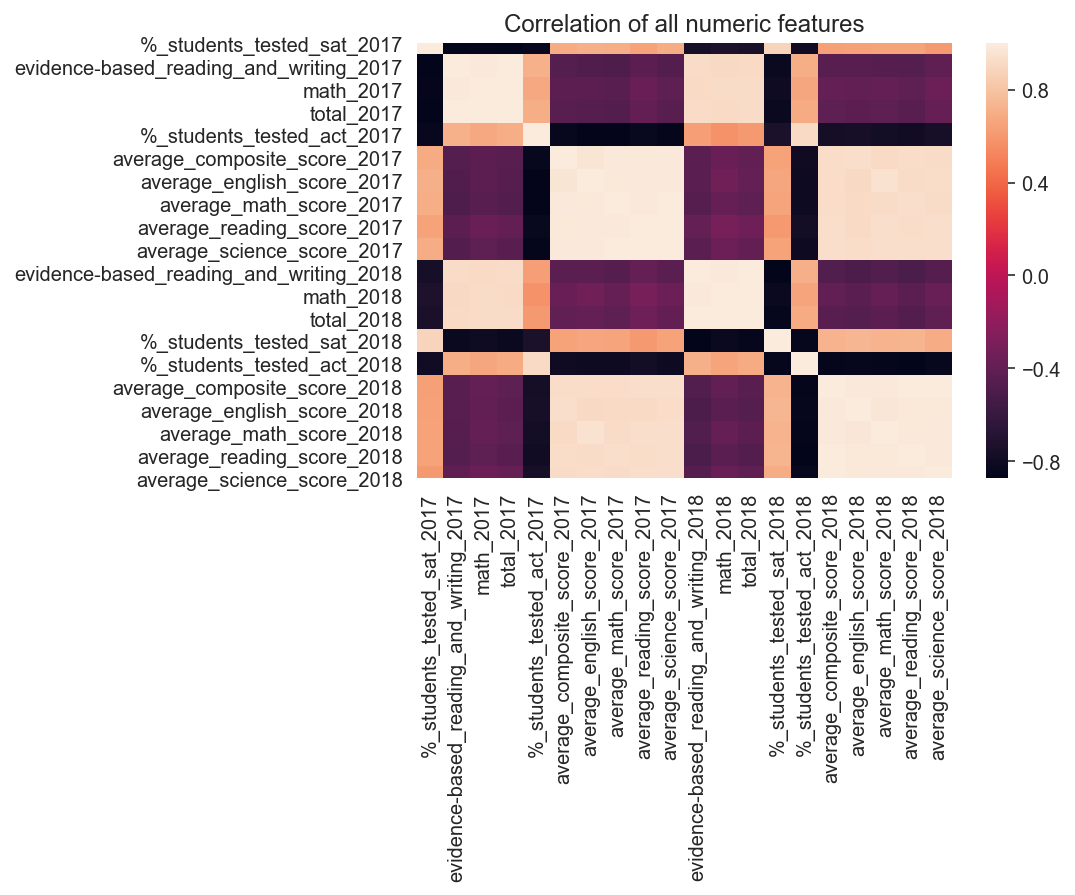

In [81]:
ax = plt.axes()
sns.heatmap(final.corr(), ax = ax)

ax.set_title('Correlation of all numeric features')
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [82]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,10)) # You'll want to specify your figsize
    fig.tight_layout(w_pad=2)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title('Histogram of '+str(column))
        #ax[i].set_xlabel(list_of_titles[i])
        ax[i].set_ylabel('Number of States')
        # i need to set title for each subplot 
        # need x-axis that that states particapation rates
        # need y-axis that states frequency-count of states

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [83]:
# Code You do this!!!
list_of_columns=final.columns
list_of_titles=['2017 SAT participation rates','2017 ACT participation rates']

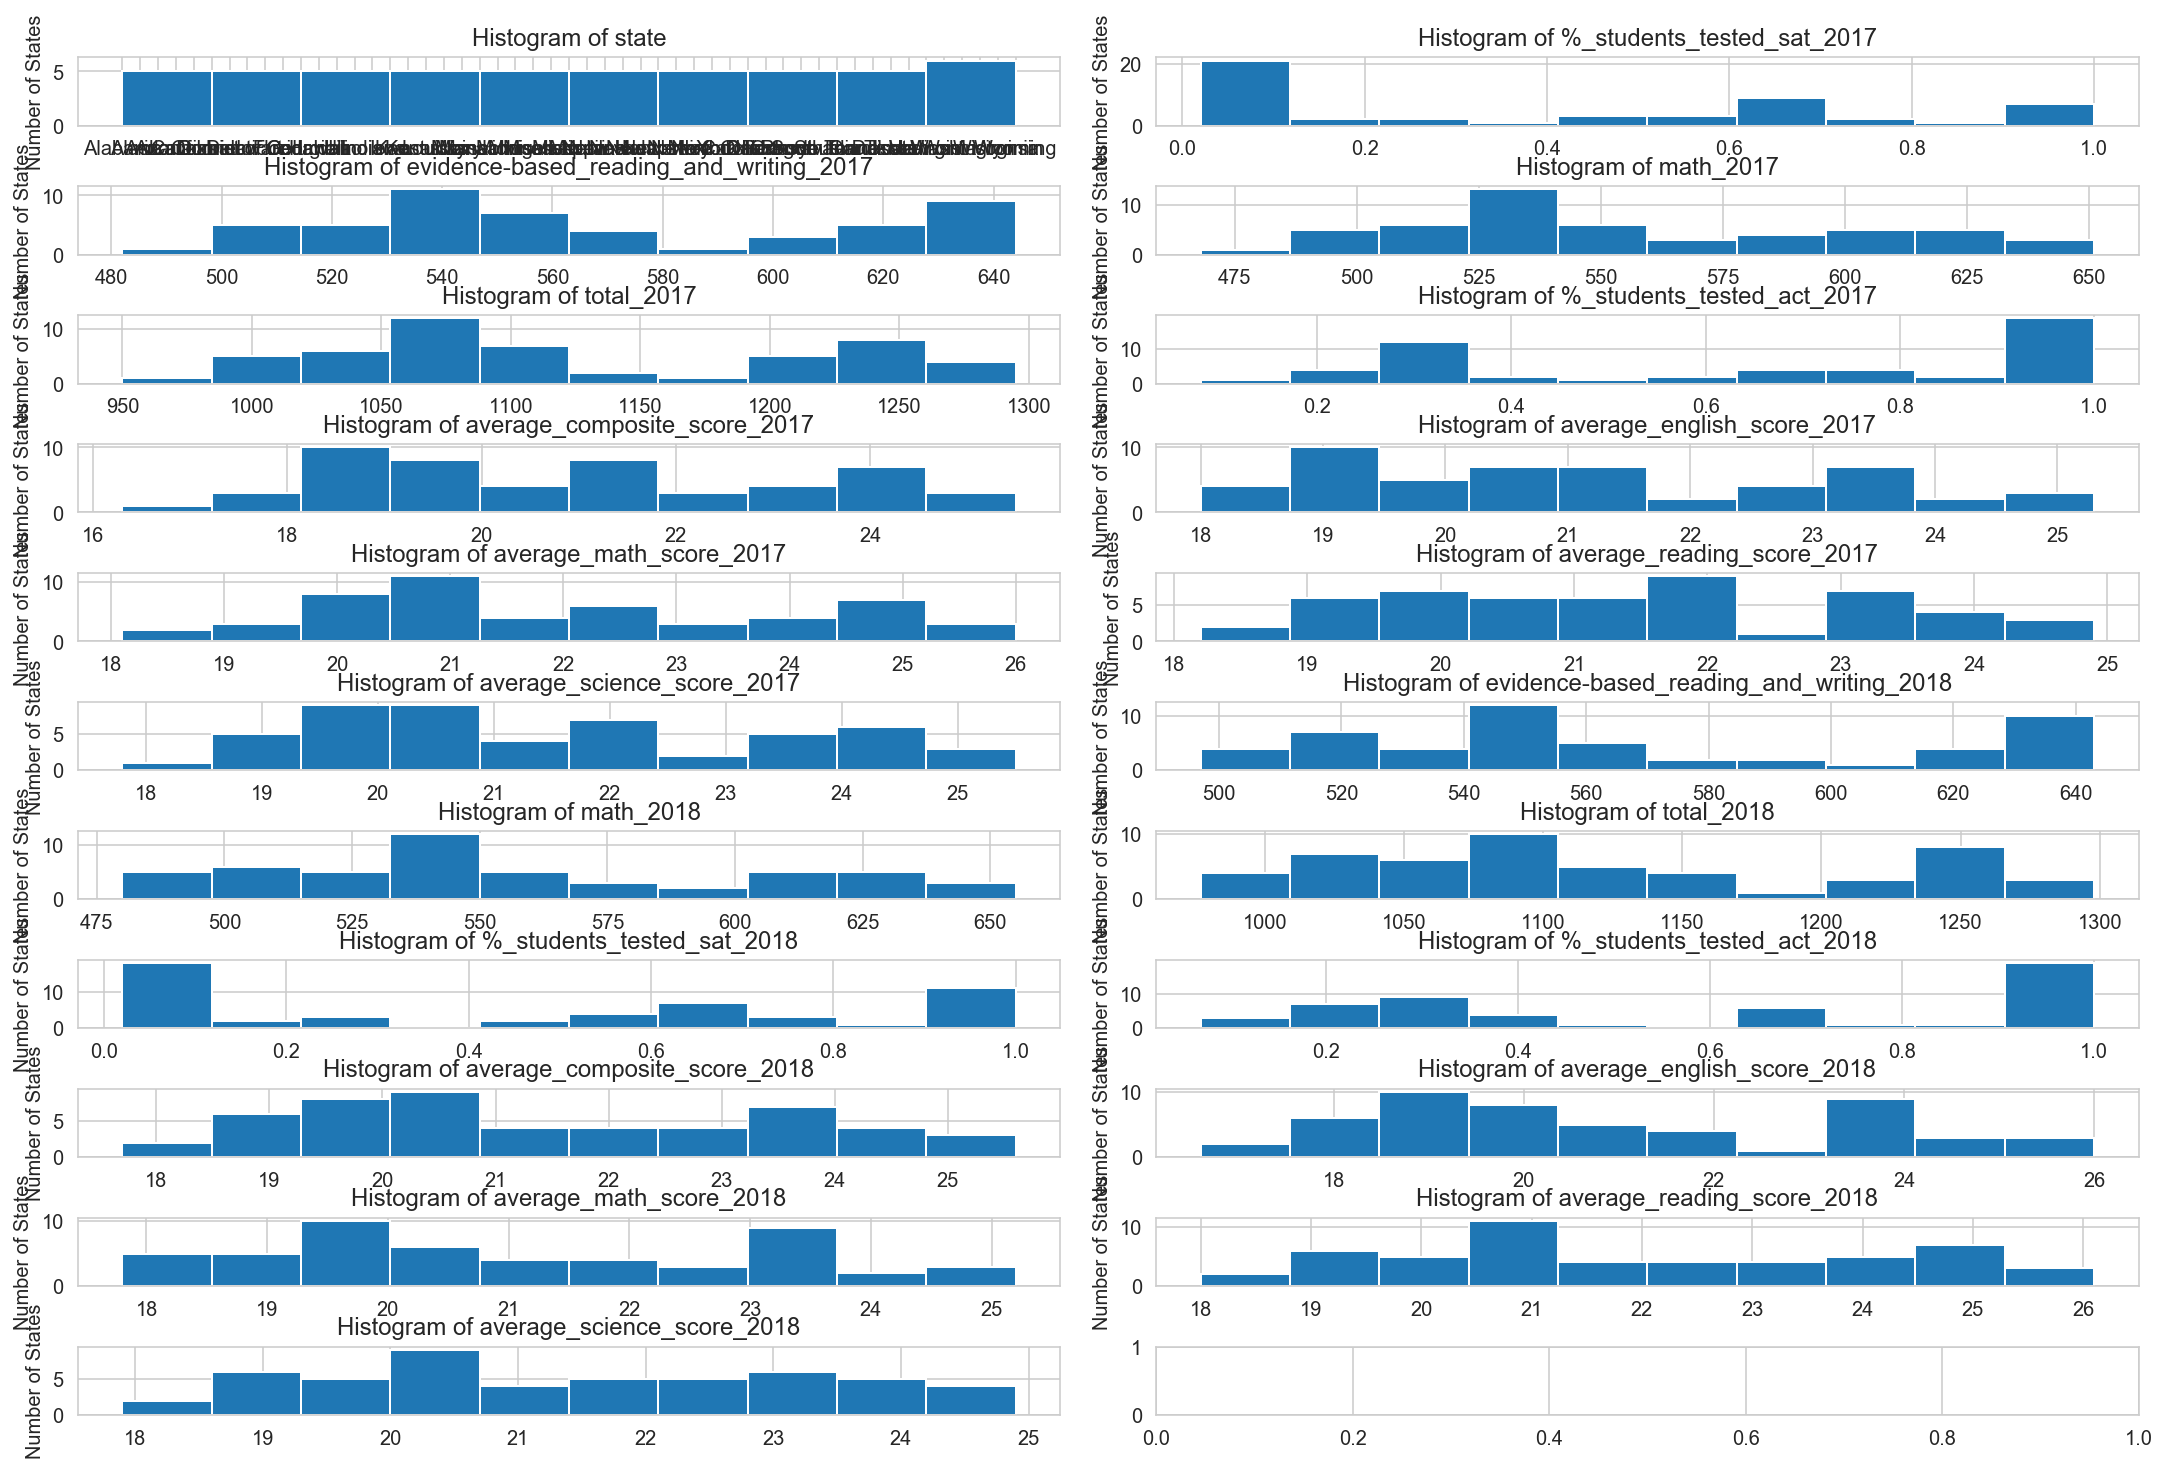

In [84]:
subplot_histograms(final,list_of_columns,list_of_titles)

In [85]:
# Code You do this!!!
list_of_columns1=['math_2017','average_math_score_2017']
list_of_titles1=['2017 SAT Math scores','2017 ACT Math Scores']


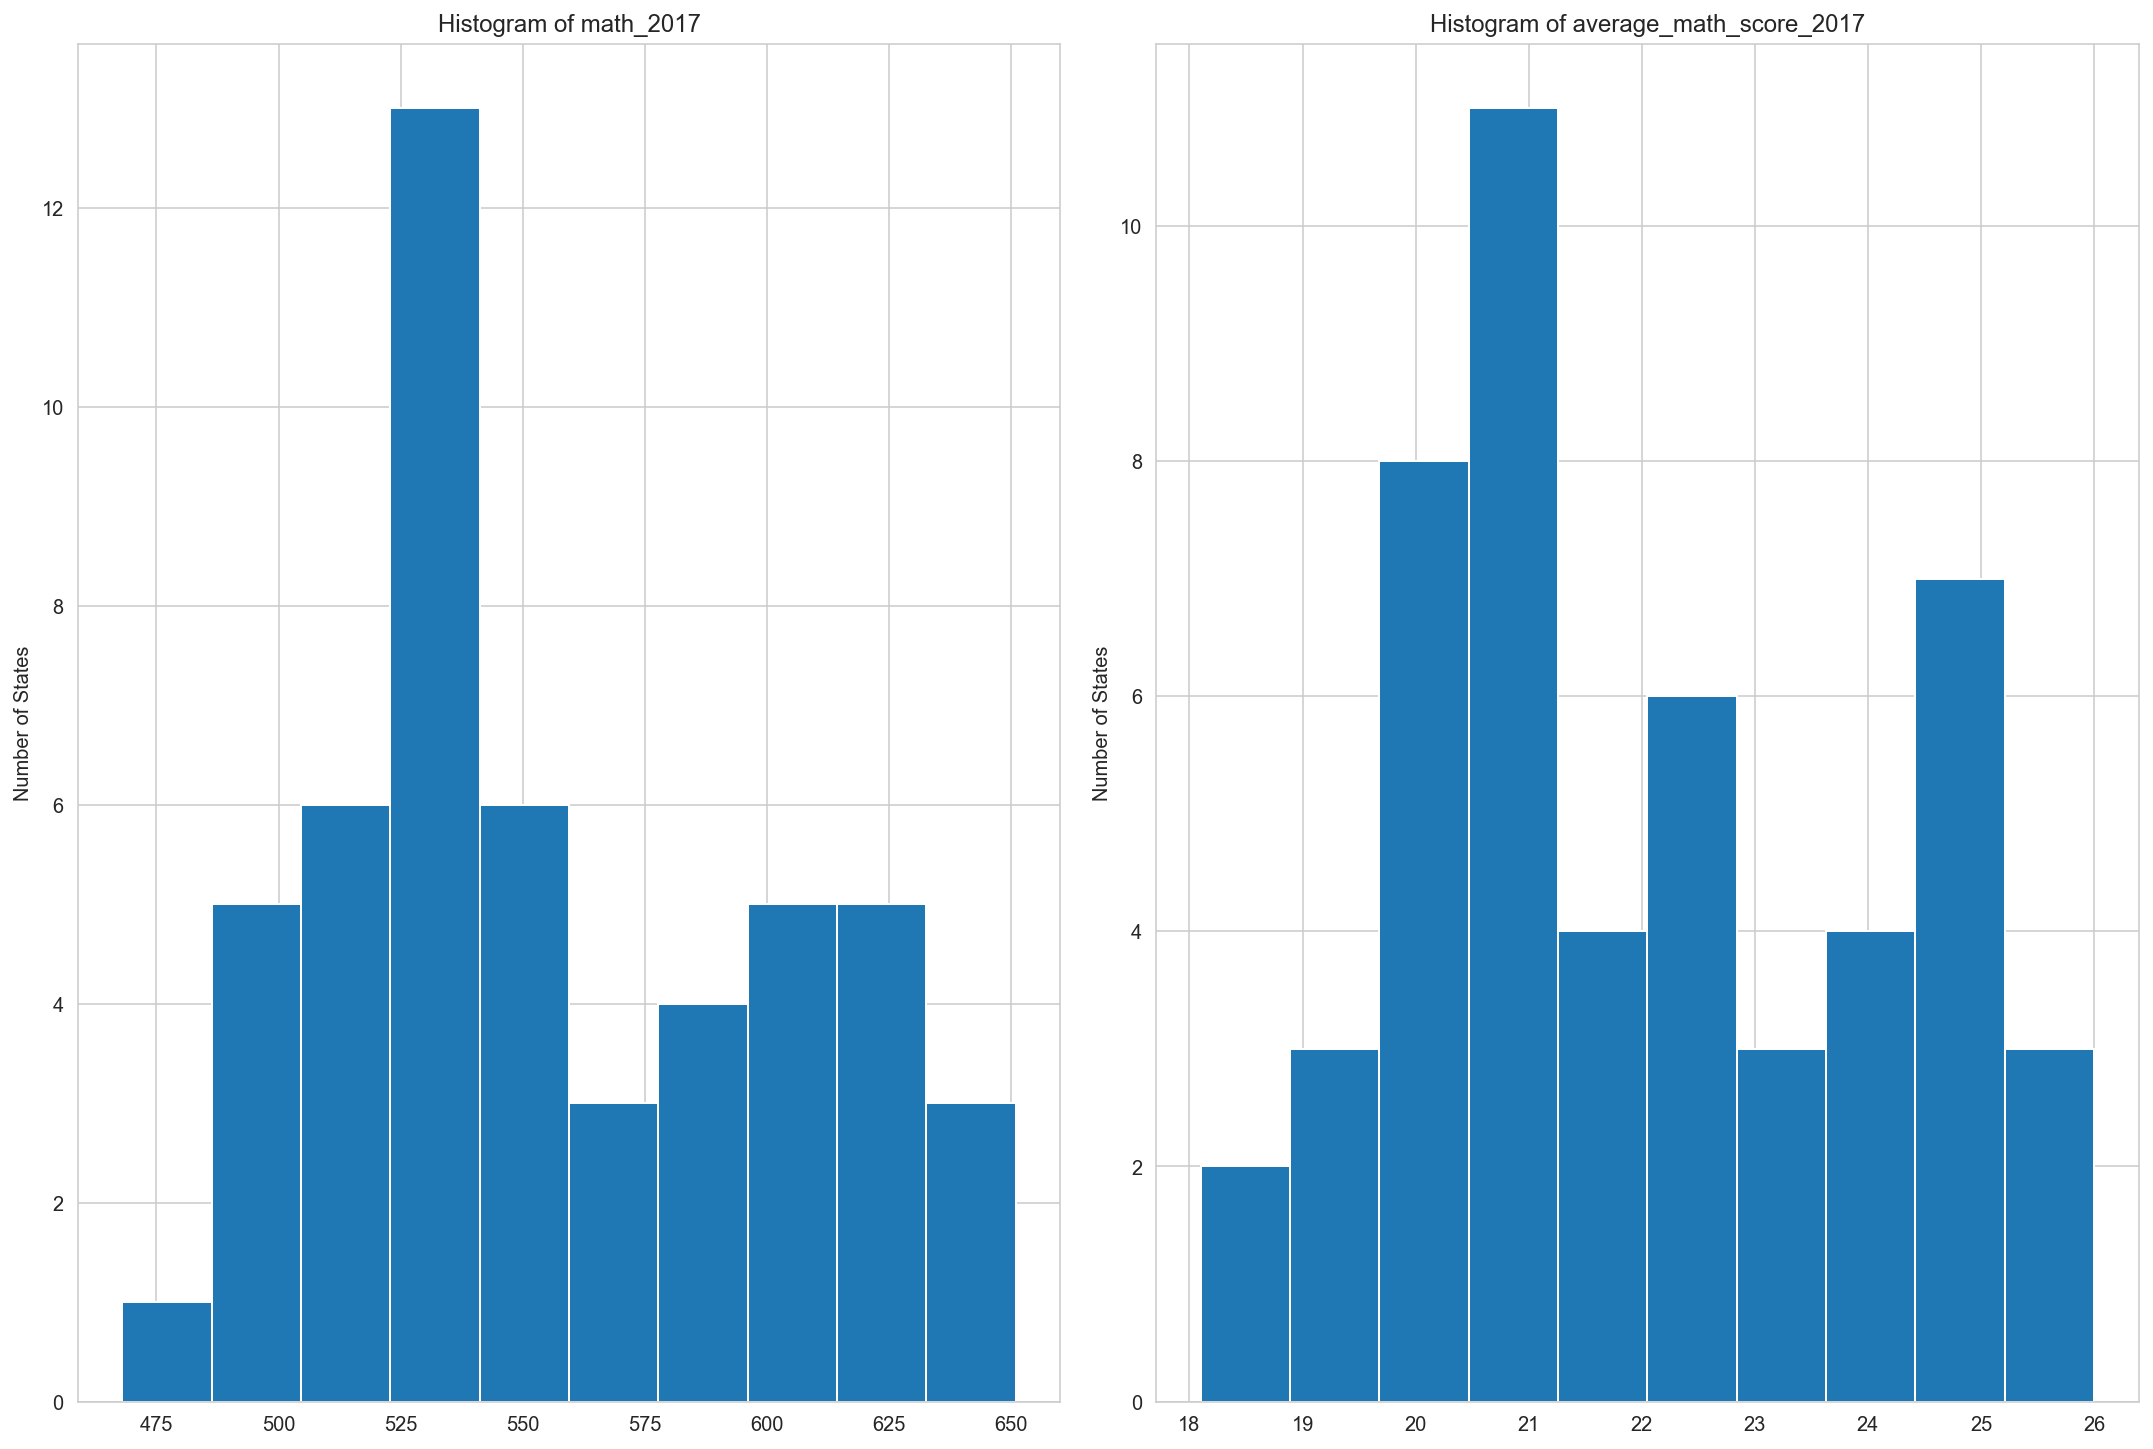

In [86]:
subplot_histograms(final,list_of_columns1,list_of_titles1)

In [87]:
# Code You do this!!!
list_of_columns3=['evidence-based_reading_and_writing_2017','average_reading_score_2017']
list_of_titles3=['2017 ERW scores','2017 ACT reading scores']
list_of_x_label=[i for i in final['state'] ]

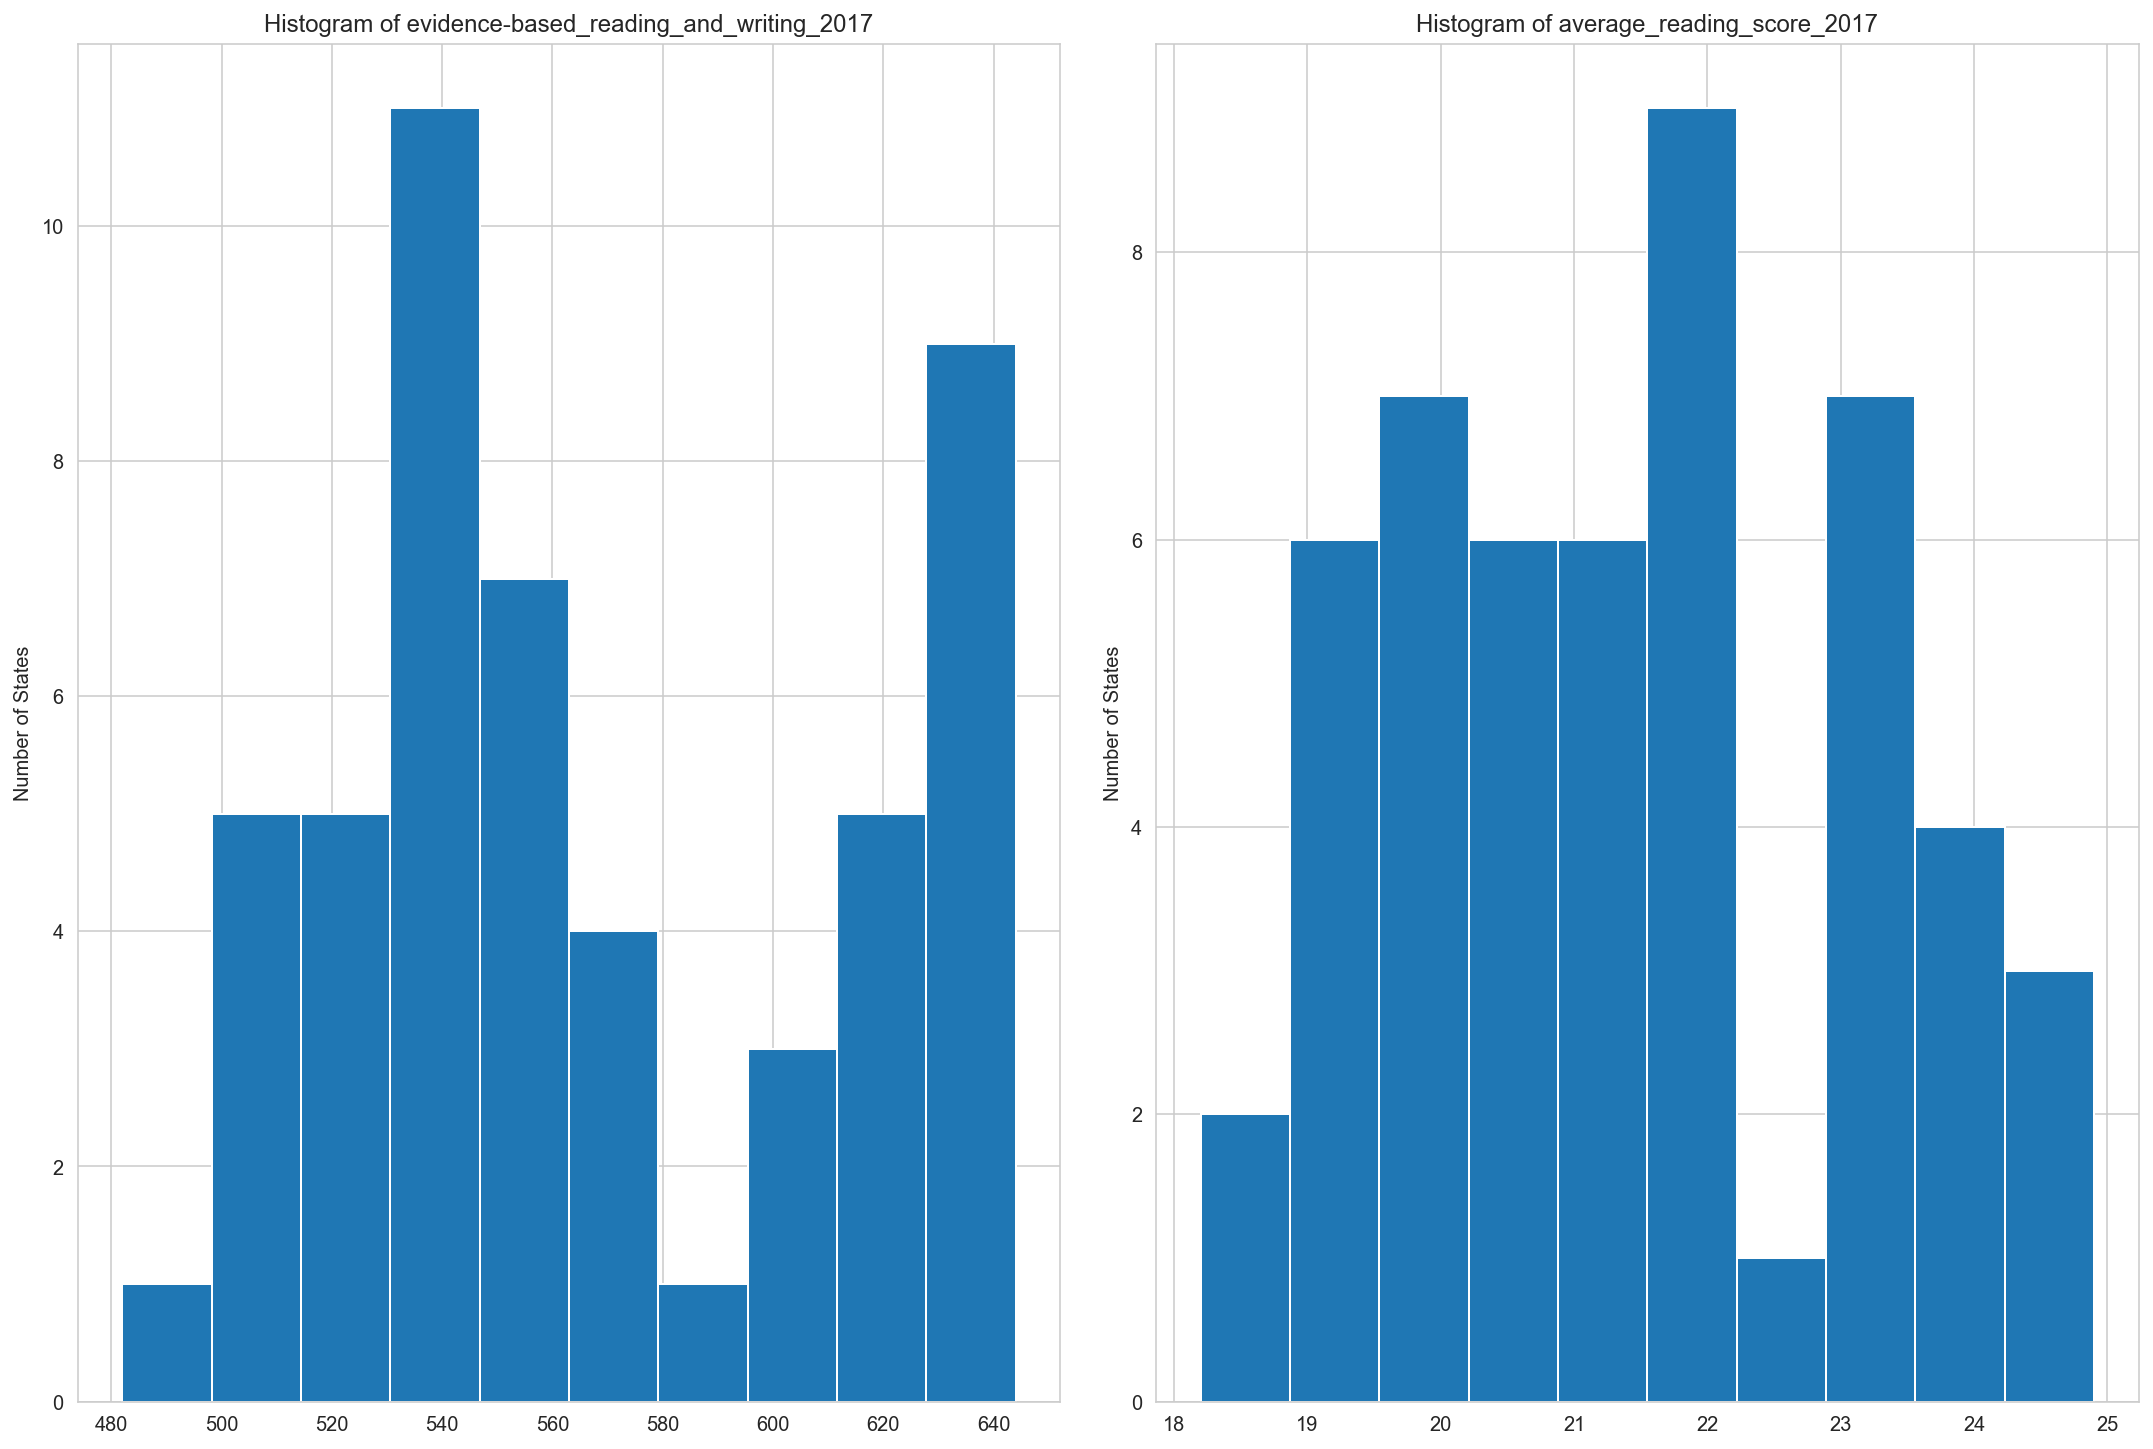

In [88]:
subplot_histograms(final,list_of_columns3,list_of_titles3)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [89]:
def subplot_scatterplots(data, list_of_columns,title_name):
    plt.figure(figsize=(10,8))
    plt.scatter(data[list_of_columns[0]],data[list_of_columns[1]], alpha=0.5,s = 124)
    plt.xlabel(list_of_columns[0])
    plt.ylabel(list_of_columns[1])
    plt.title(title_name)
    


In [90]:
list_of_columnstes=['%_students_tested_act_2017','%_students_tested_sat_2017']
list_of_titlestes=['2017 SAT participation rates','2017 ACT participation rates']


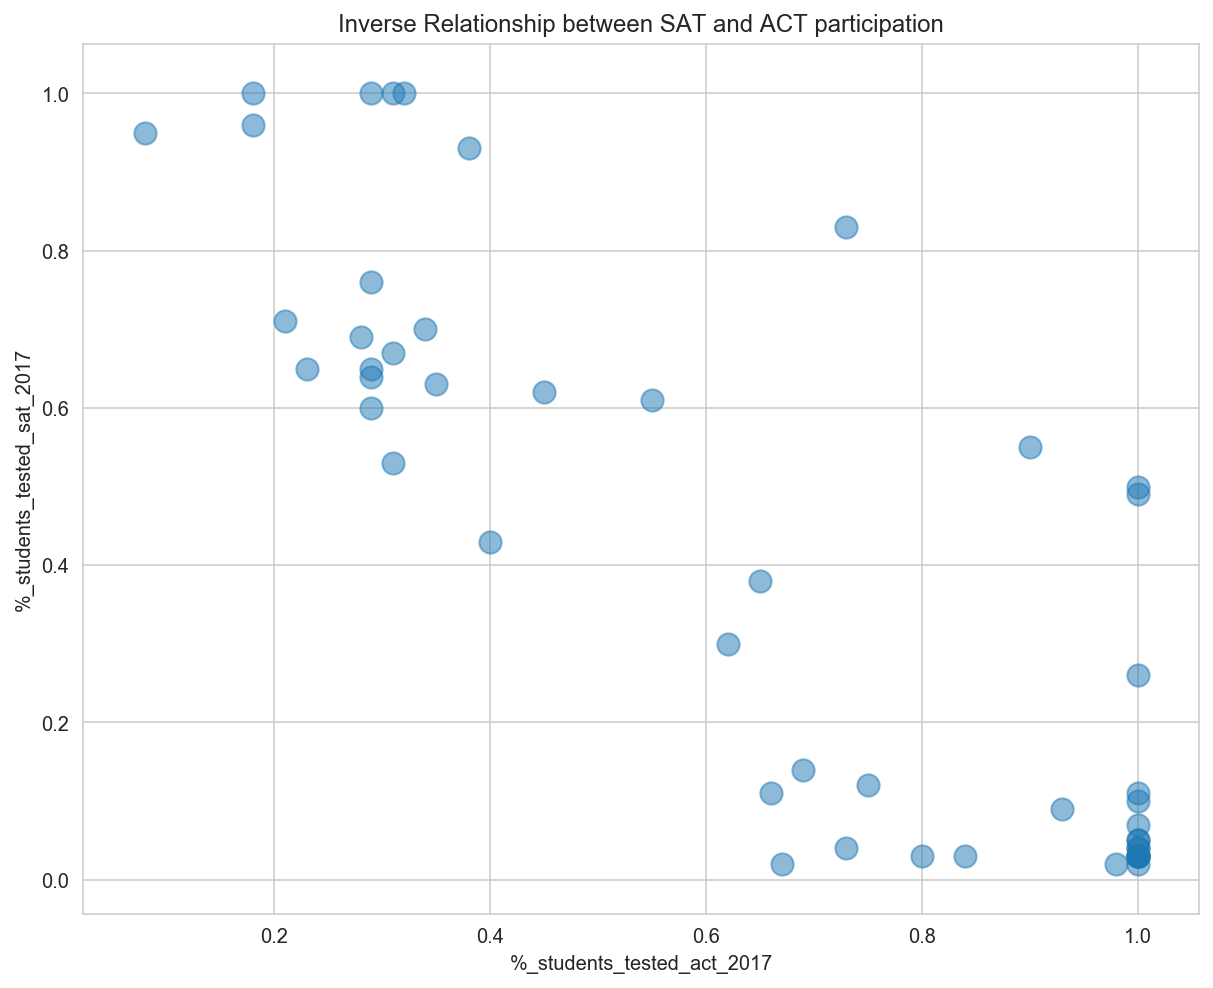

In [91]:
 subplot_scatterplots(final,list_of_columnstes,'Inverse Relationship between SAT and ACT participation')

In [92]:
list_of_columns1=['math_2017', 'average_math_score_2017']
list_of_columns=['%_students_tested_sat_2017','total_2017']

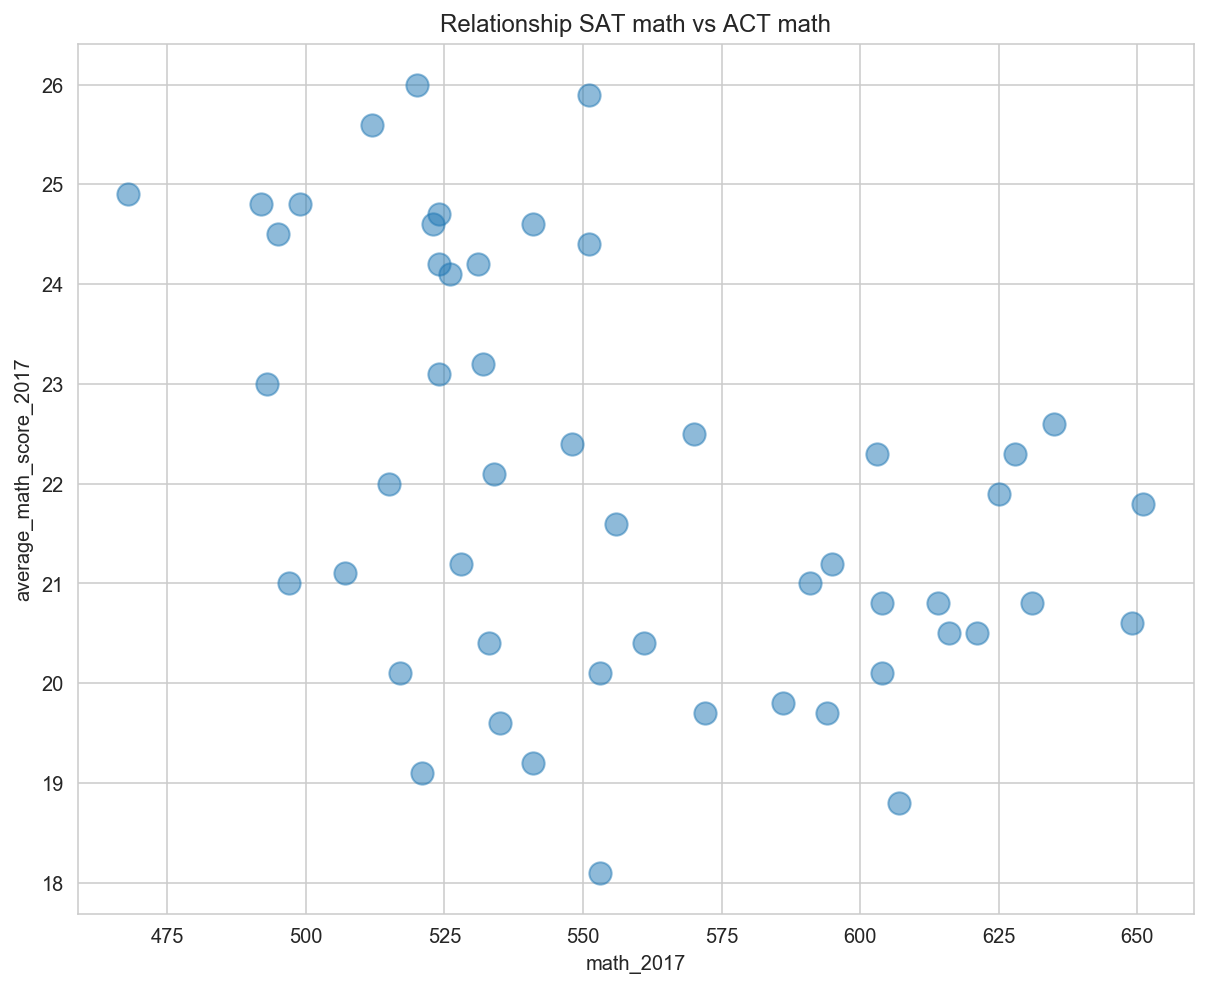

In [93]:
subplot_scatterplots(final,list_of_columns1,'Relationship SAT math vs ACT math')

In [94]:
list_of_columns3=['evidence-based_reading_and_writing_2017','average_reading_score_2017']

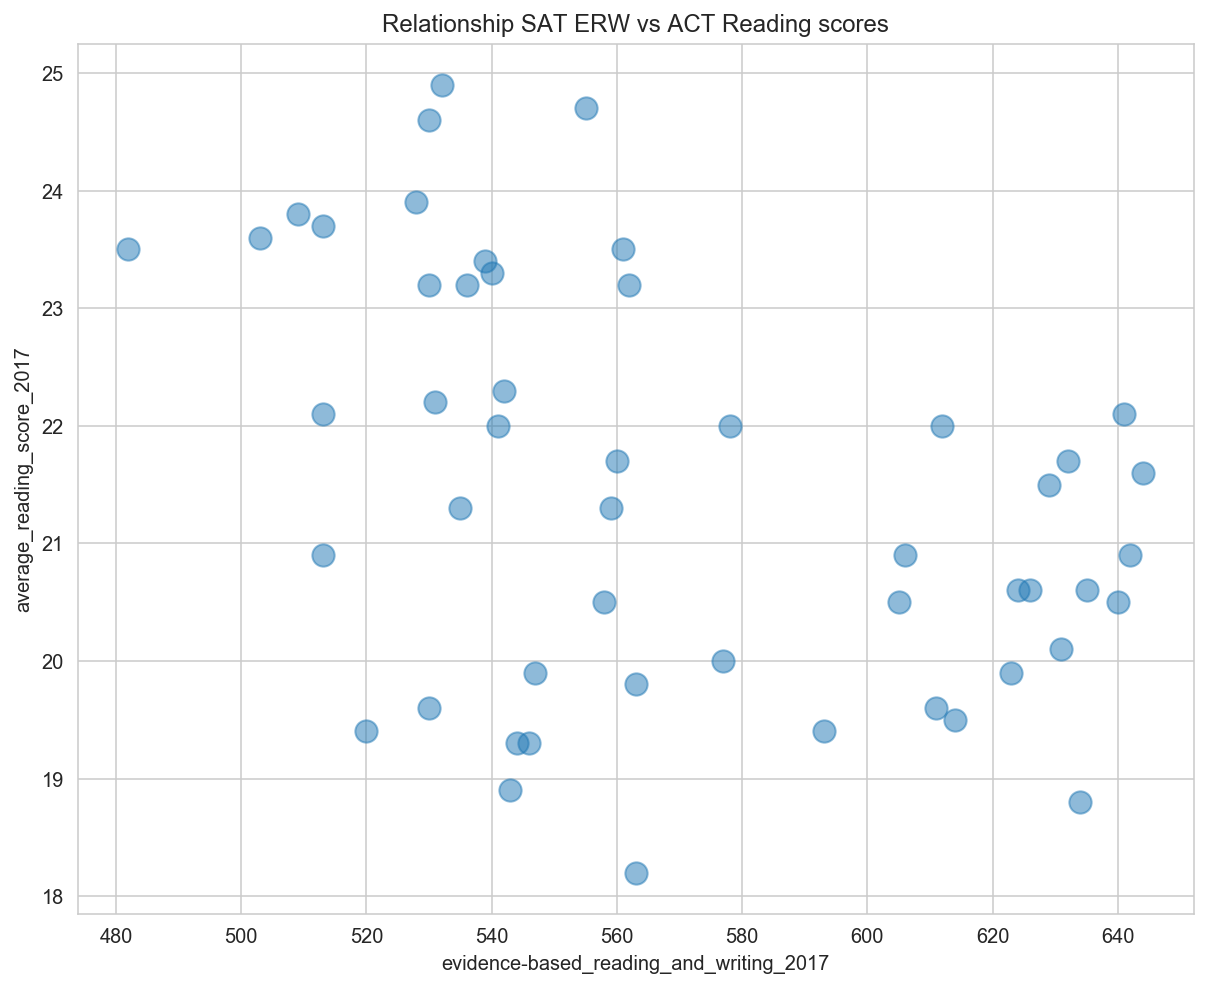

In [95]:
subplot_scatterplots(final,list_of_columns3,'Relationship SAT ERW vs ACT Reading scores')

In [96]:
list_of_columns4=['total_2017','average_composite_score_2017']

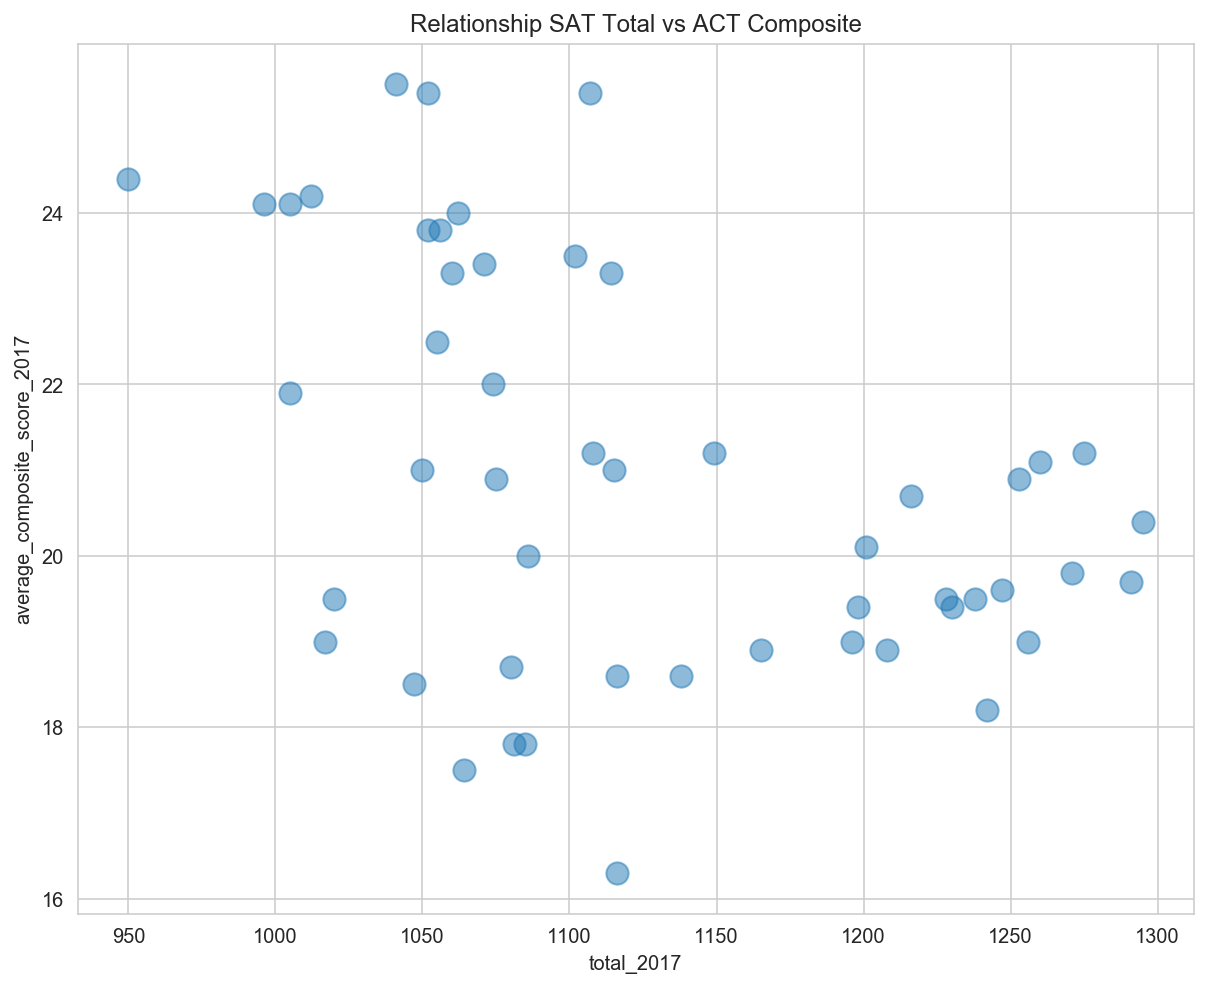

In [97]:
subplot_scatterplots(final,list_of_columns4,'Relationship SAT Total vs ACT Composite')

In [98]:
#Total scores for SAT 2017 vs. 2018
list_of_columns5=['total_2017','total_2018']

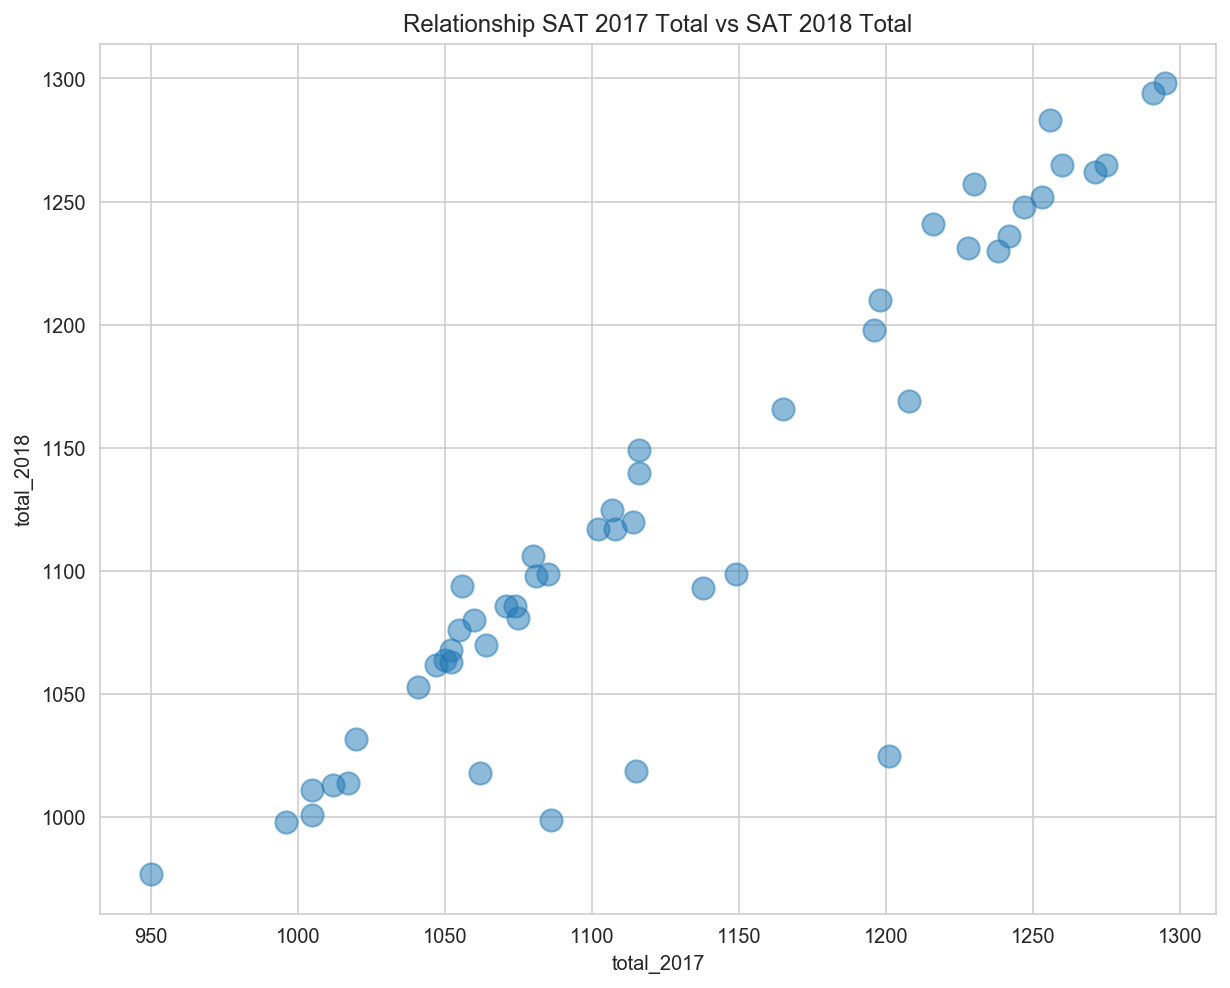

In [99]:
subplot_scatterplots(final,list_of_columns5,'Relationship SAT 2017 Total vs SAT 2018 Total')

In [100]:
list_of_columns6=['average_composite_score_2017','average_composite_score_2018']

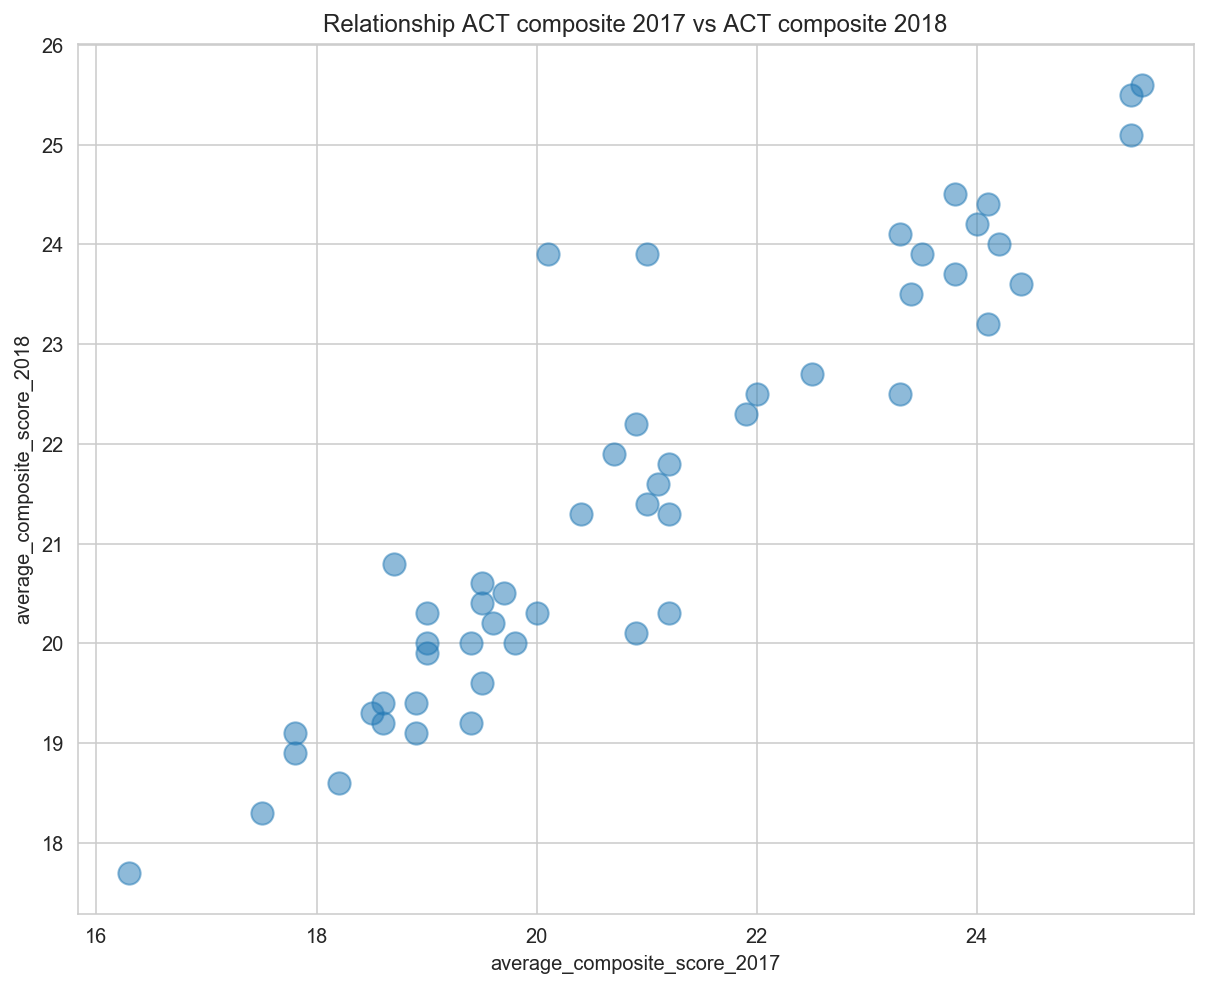

In [101]:
subplot_scatterplots(final,list_of_columns6,'Relationship ACT composite 2017 vs ACT composite 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [102]:
# Re-order Columns
final1 = final[['state','%_students_tested_sat_2017','%_students_tested_sat_2018','evidence-based_reading_and_writing_2017','evidence-based_reading_and_writing_2018',
               'math_2017','math_2018','total_2017','total_2018','%_students_tested_act_2017','%_students_tested_act_2018','average_composite_score_2017','average_composite_score_2018',
               'average_english_score_2017','average_english_score_2018','average_math_score_2017','average_math_score_2018',
               'average_reading_score_2017','average_reading_score_2018','average_science_score_2017','average_science_score_2018']]

In [103]:
final1.columns

Index(['state', '%_students_tested_sat_2017', '%_students_tested_sat_2018',
       'evidence-based_reading_and_writing_2017',
       'evidence-based_reading_and_writing_2018', 'math_2017', 'math_2018',
       'total_2017', 'total_2018', '%_students_tested_act_2017',
       '%_students_tested_act_2018', 'average_composite_score_2017',
       'average_composite_score_2018', 'average_english_score_2017',
       'average_english_score_2018', 'average_math_score_2017',
       'average_math_score_2018', 'average_reading_score_2017',
       'average_reading_score_2018', 'average_science_score_2017',
       'average_science_score_2018'],
      dtype='object')

In [104]:
list_of_columnsa=['%_students_tested_sat_2017','%_students_tested_sat_2018']
list_of_columnsb=['evidence-based_reading_and_writing_2017','evidence-based_reading_and_writing_2018']
list_of_columnsc=['math_2017','math_2018']
list_of_columnsd=['total_2017','total_2018']
list_of_columnse=['%_students_tested_act_2017','%_students_tested_act_2018']
list_of_columnsf=['average_english_score_2017','average_english_score_2018']
list_of_columnsg=['average_math_score_2017','average_math_score_2018']
list_of_columnsh=['average_reading_score_2017','average_reading_score_2018']
list_of_columnsi=['average_science_score_2017','average_science_score_2018']


In [105]:
def plot_boxplot(data,column,title,ylabel):
    plt.figure(figsize=(10,8))
    final.boxplot(column=[column[0],column[1]])
    plt.ylabel(ylabel)
    plt.title(title)


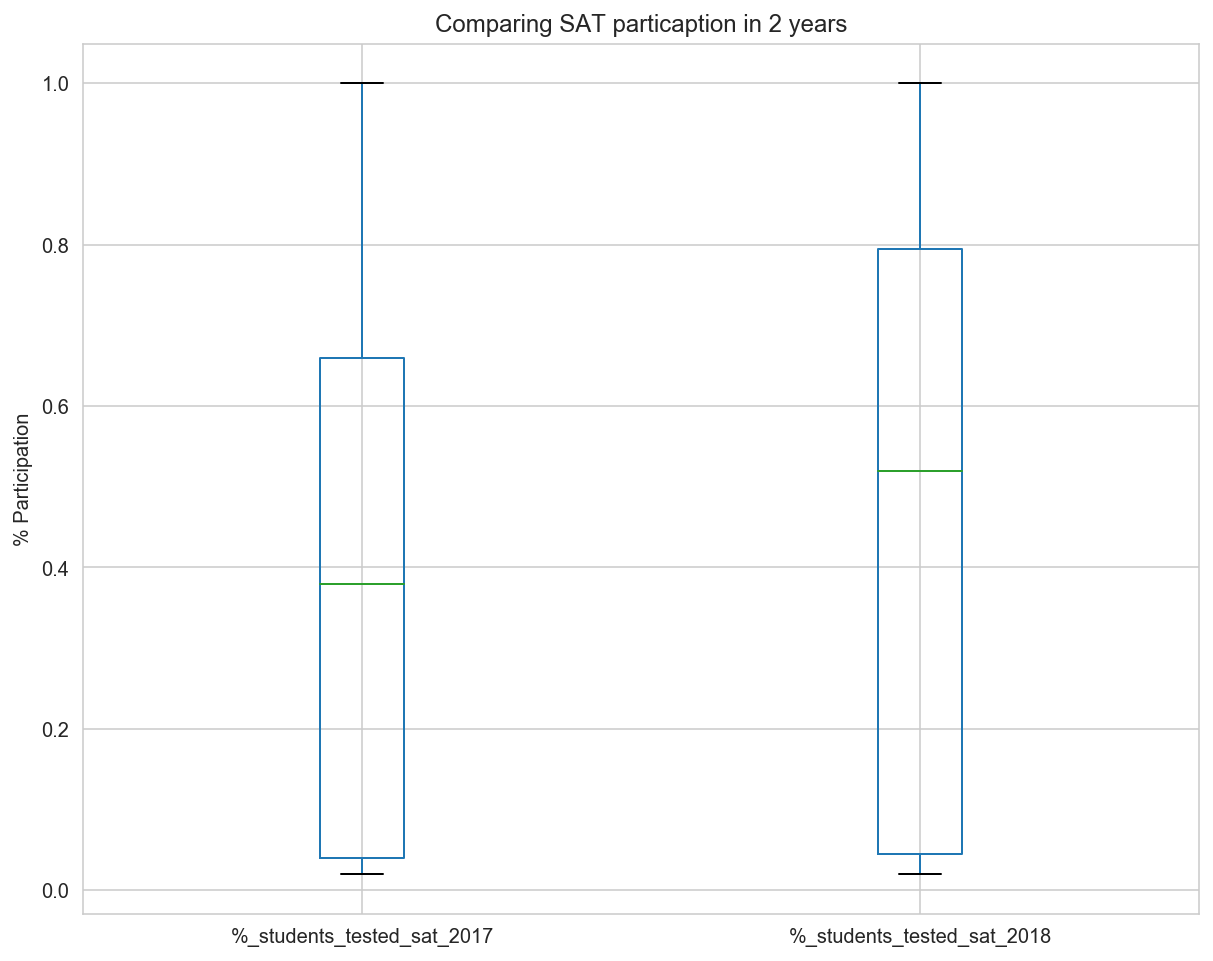

In [106]:
a=plot_boxplot(final,list_of_columnsa,'Comparing SAT particaption in 2 years','% Participation')

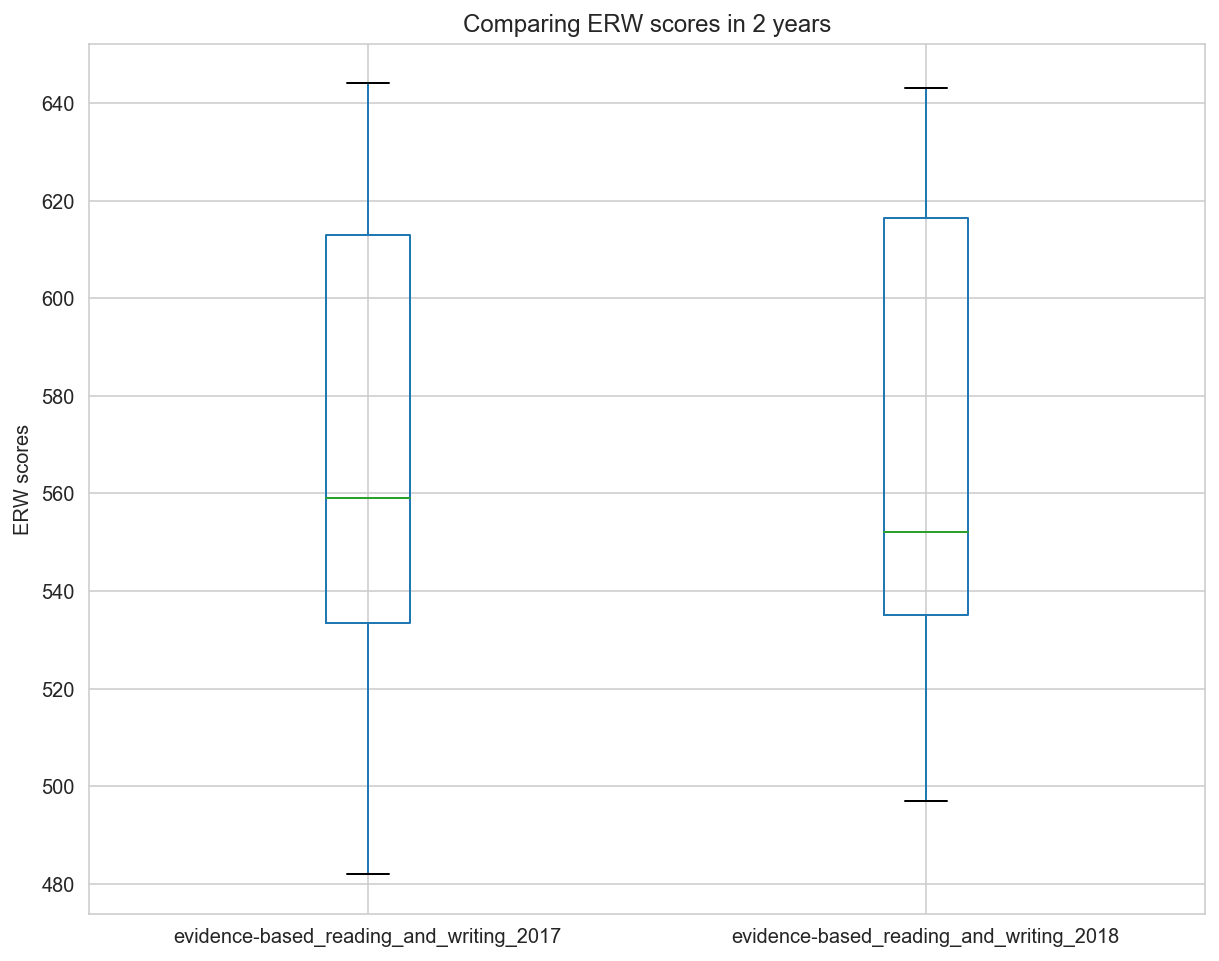

In [107]:
b=plot_boxplot(final,list_of_columnsb,'Comparing ERW scores in 2 years','ERW scores')

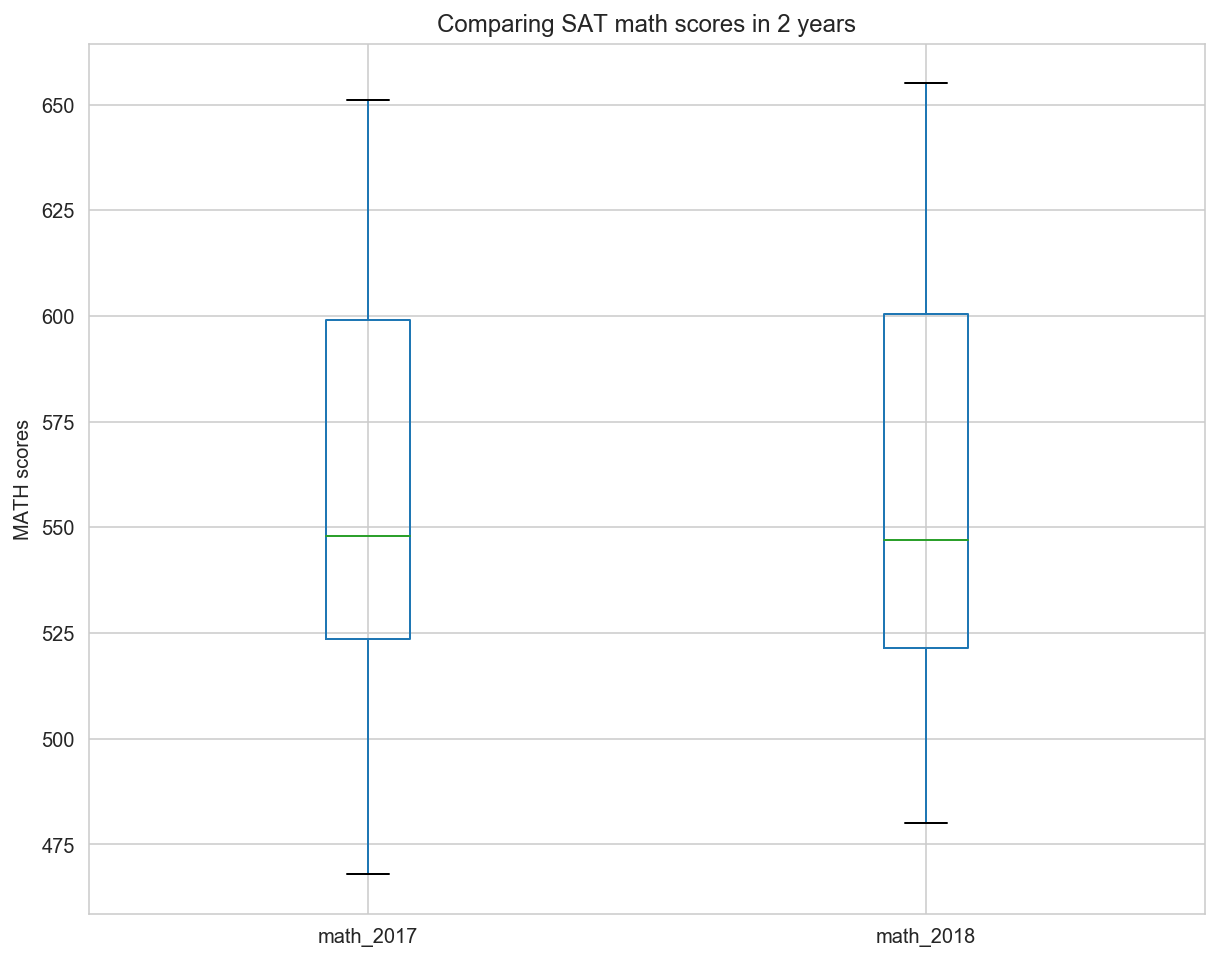

In [108]:
c=plot_boxplot(final,list_of_columnsc,'Comparing SAT math scores in 2 years','MATH scores')

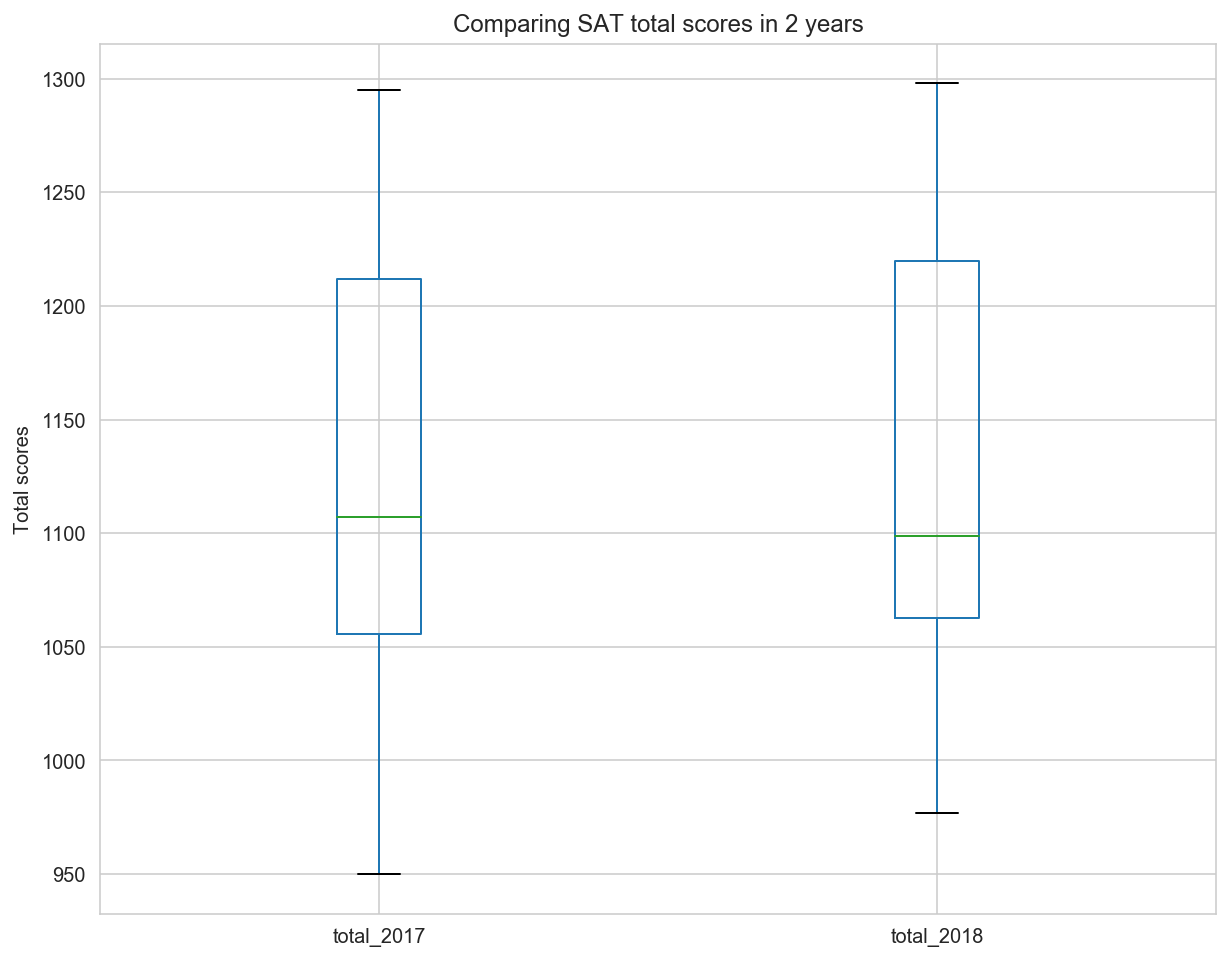

In [109]:
d=plot_boxplot(final,list_of_columnsd,'Comparing SAT total scores in 2 years','Total scores')

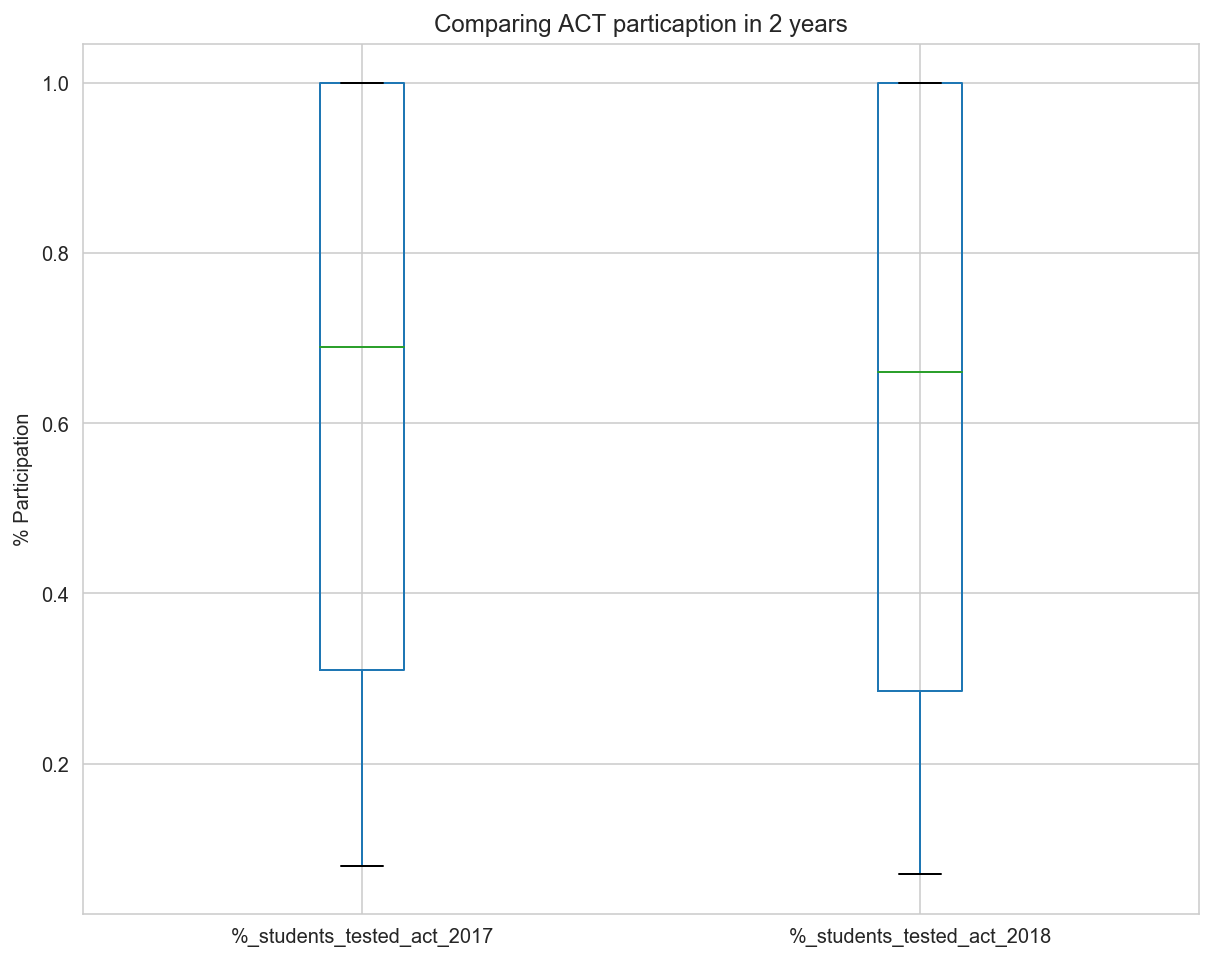

In [110]:
e=plot_boxplot(final,list_of_columnse,'Comparing ACT particaption in 2 years','% Participation')

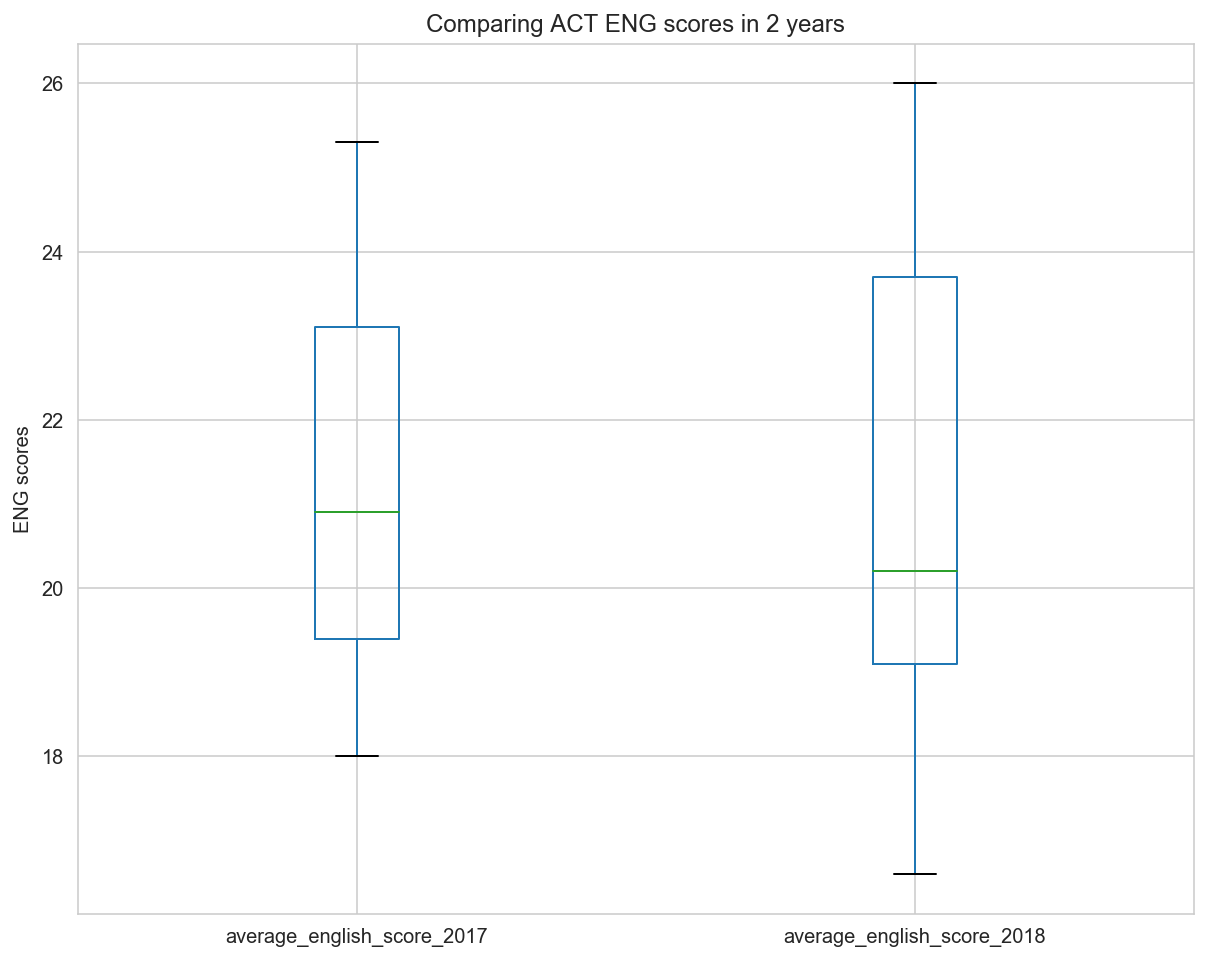

In [111]:
f=plot_boxplot(final,list_of_columnsf,'Comparing ACT ENG scores in 2 years','ENG scores')

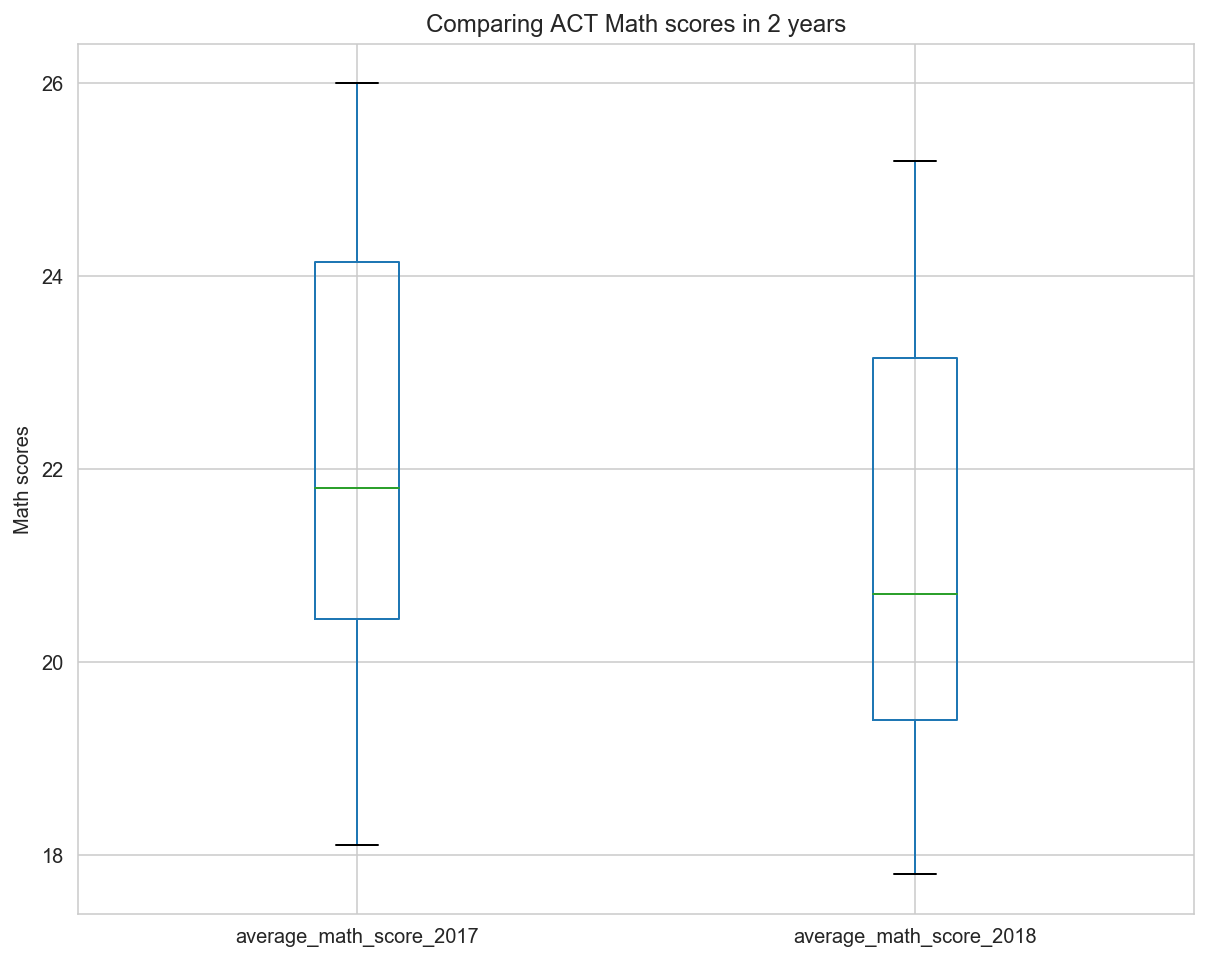

In [112]:
g=plot_boxplot(final,list_of_columnsg,'Comparing ACT Math scores in 2 years','Math scores')

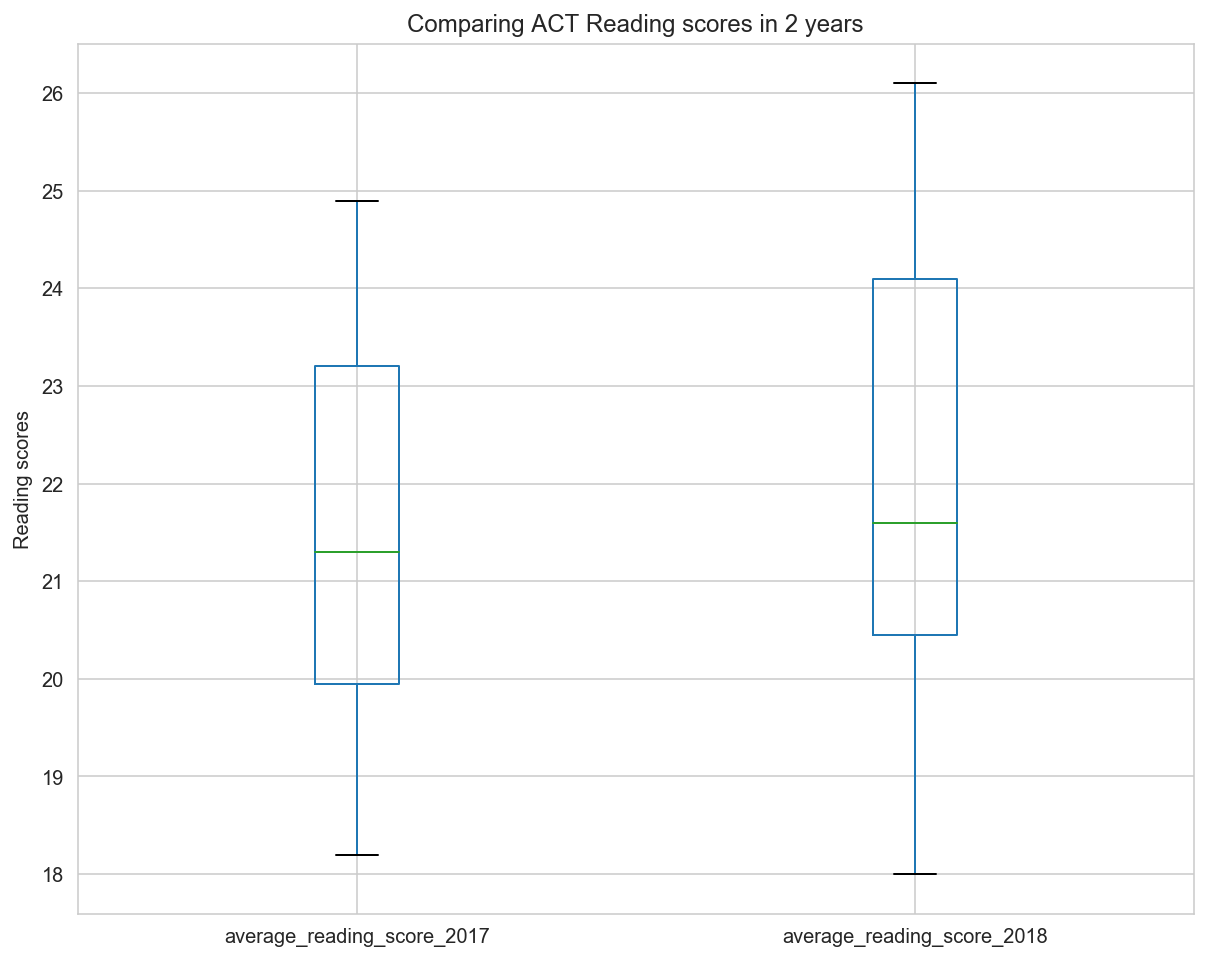

In [113]:
h=plot_boxplot(final,list_of_columnsh,'Comparing ACT Reading scores in 2 years','Reading scores')

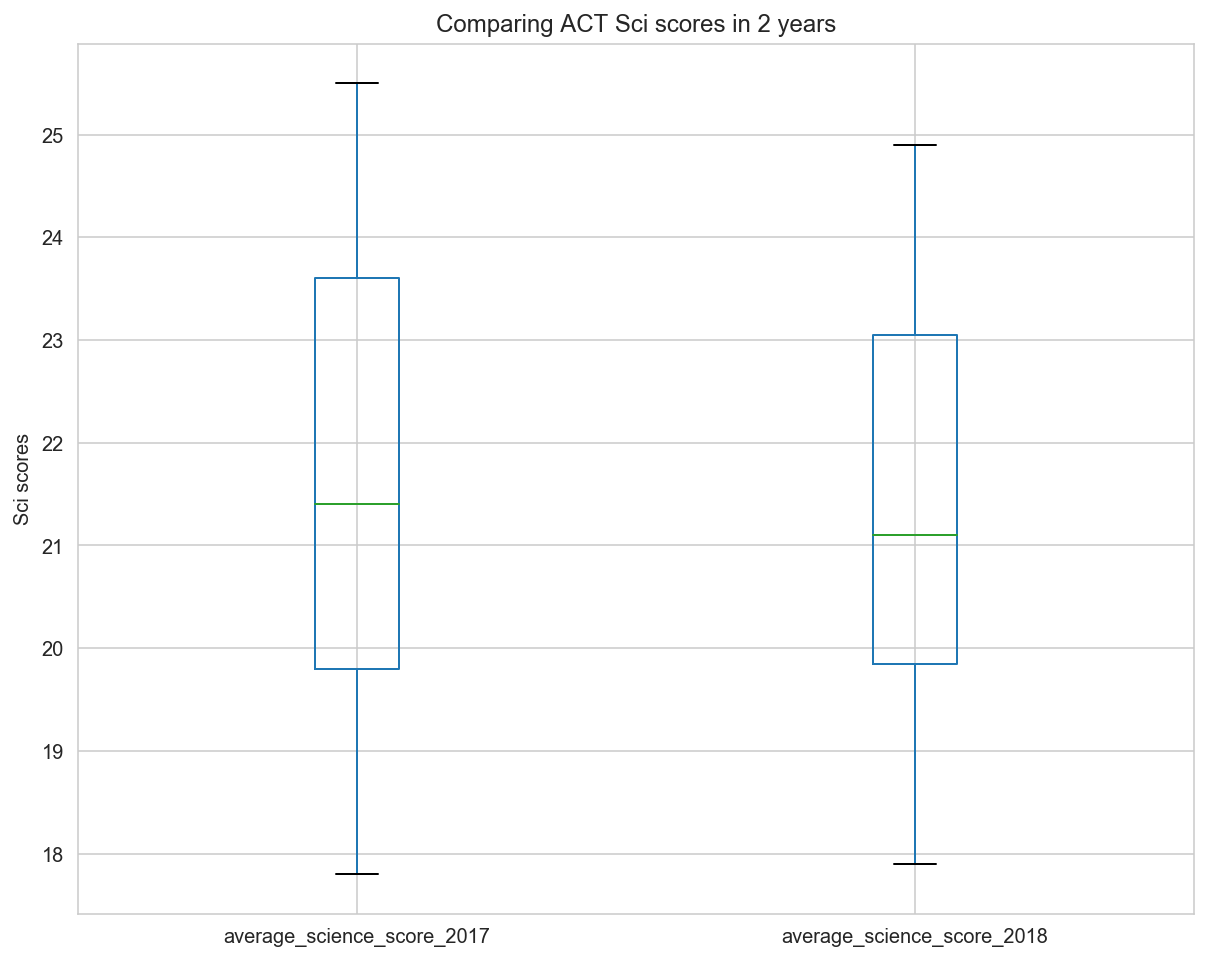

In [114]:
i=plot_boxplot(final,list_of_columnsi,'Comparing ACT Sci scores in 2 years','Sci scores')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [115]:
state1 = list(final['state'])
sevensat=list(final['%_students_tested_sat_2017'])
eightsat=list(final['%_students_tested_sat_2018'])
sevenact=list(final['%_students_tested_act_2017'])
eightact=list(final['%_students_tested_act_2018'])

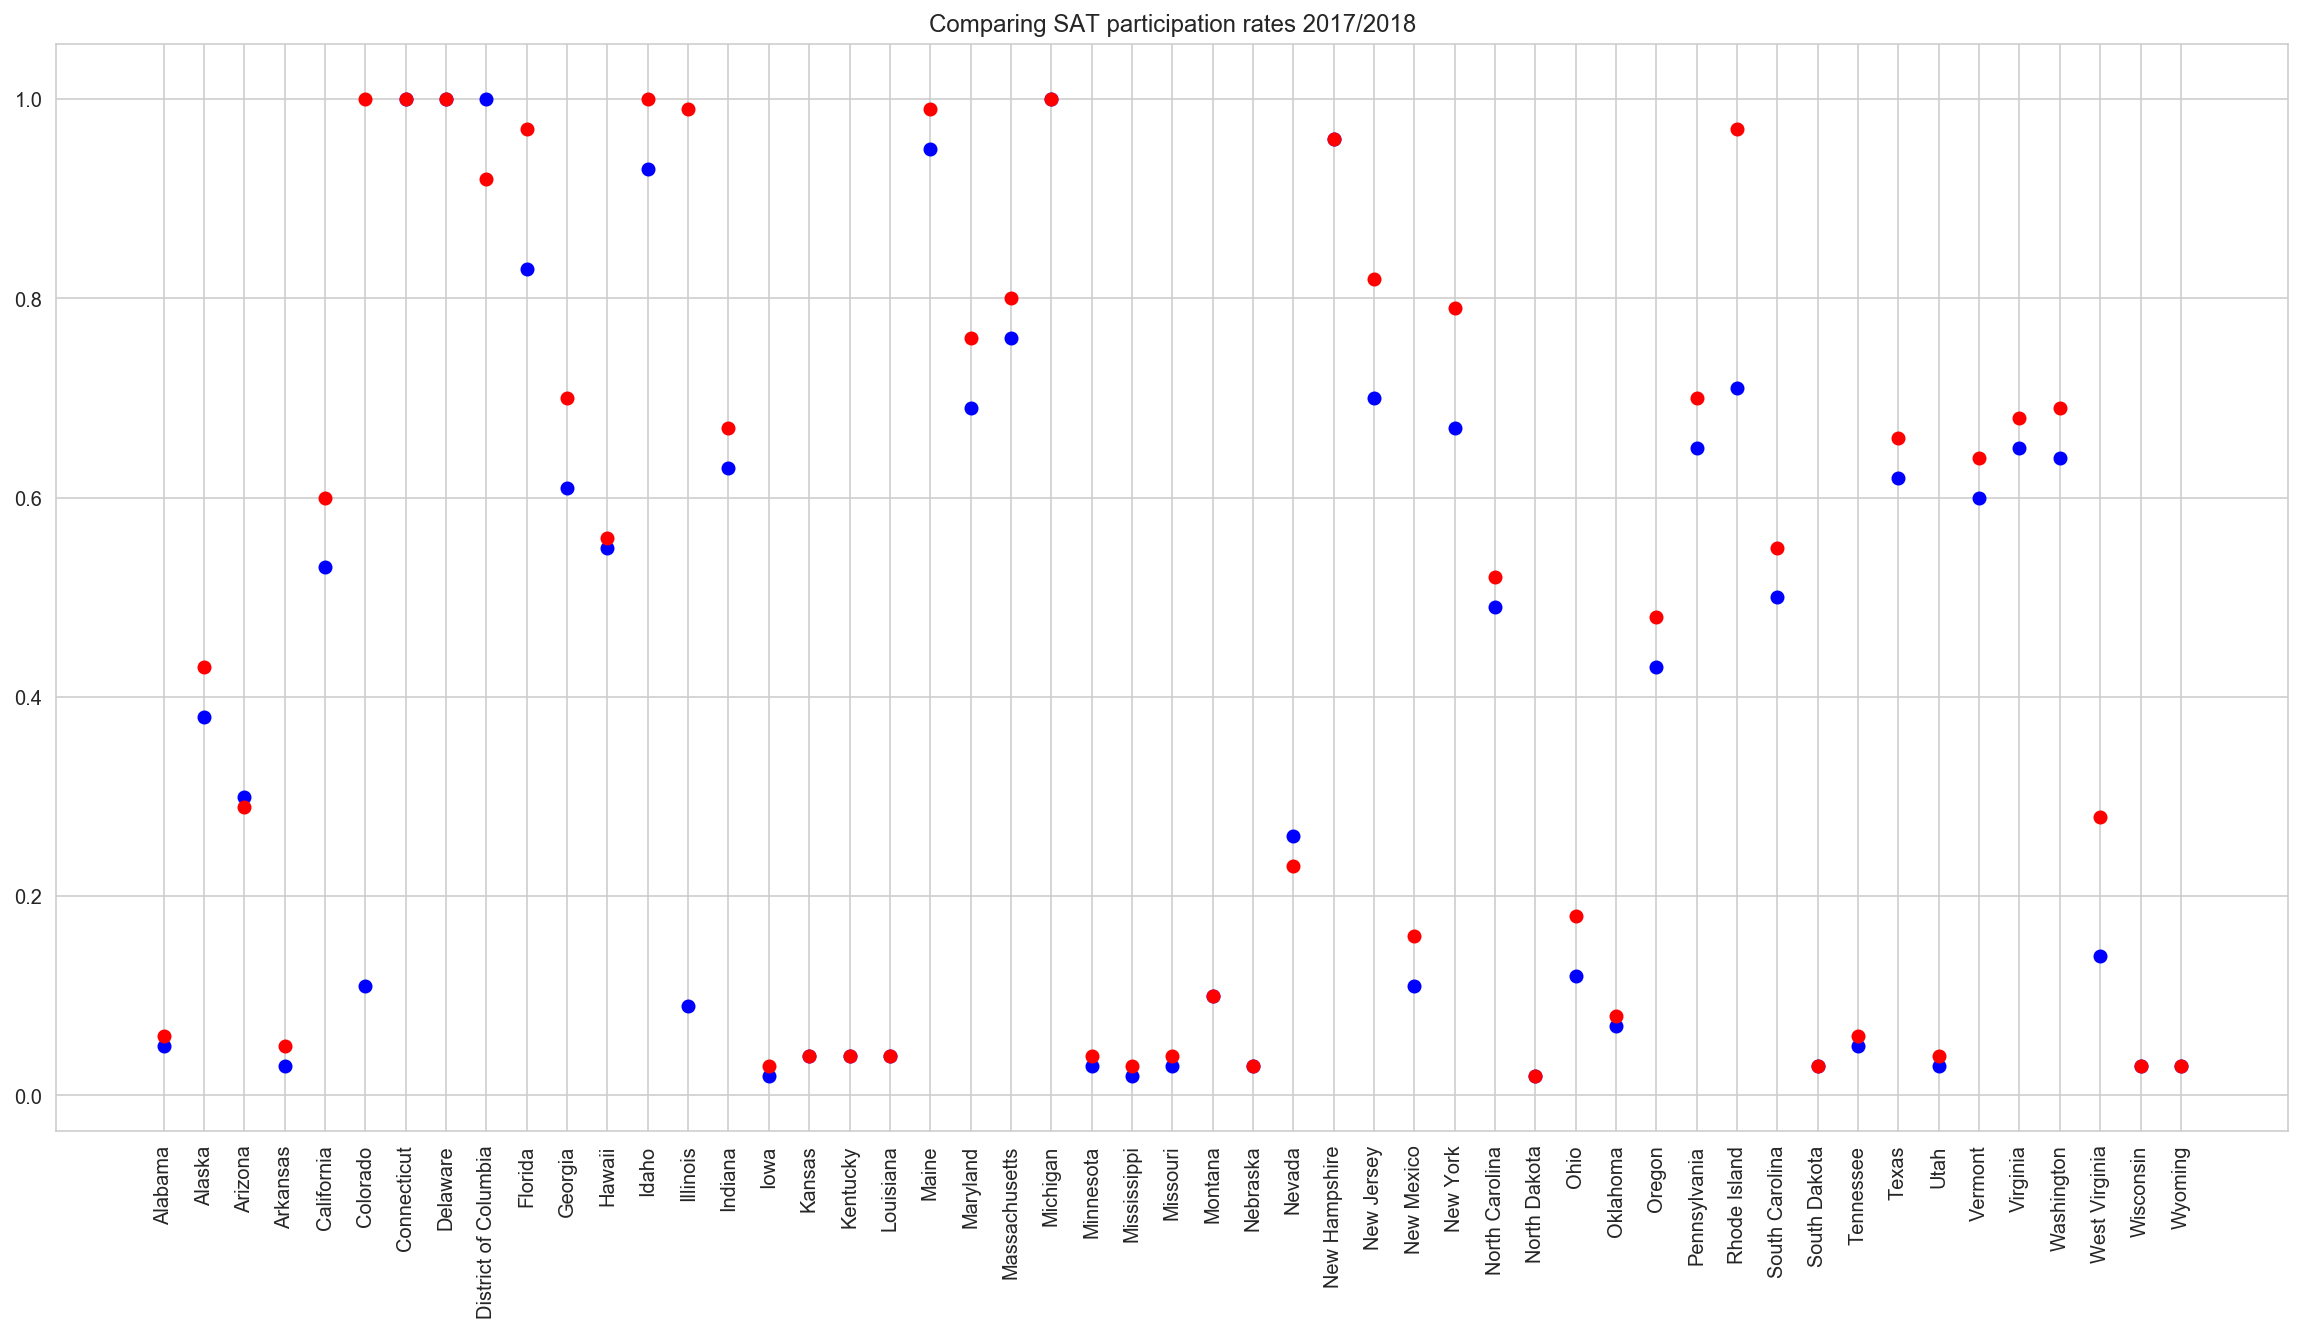

In [116]:
#plot scatter plot comparing SAT participation rates 
plt.figure(figsize=(20,10))
plt.scatter(state1,sevensat,c='blue')
plt.scatter(state1,eightsat,c='red')
plt.xticks(rotation=90)
plt.title('Comparing SAT participation rates 2017/2018')
plt.show()

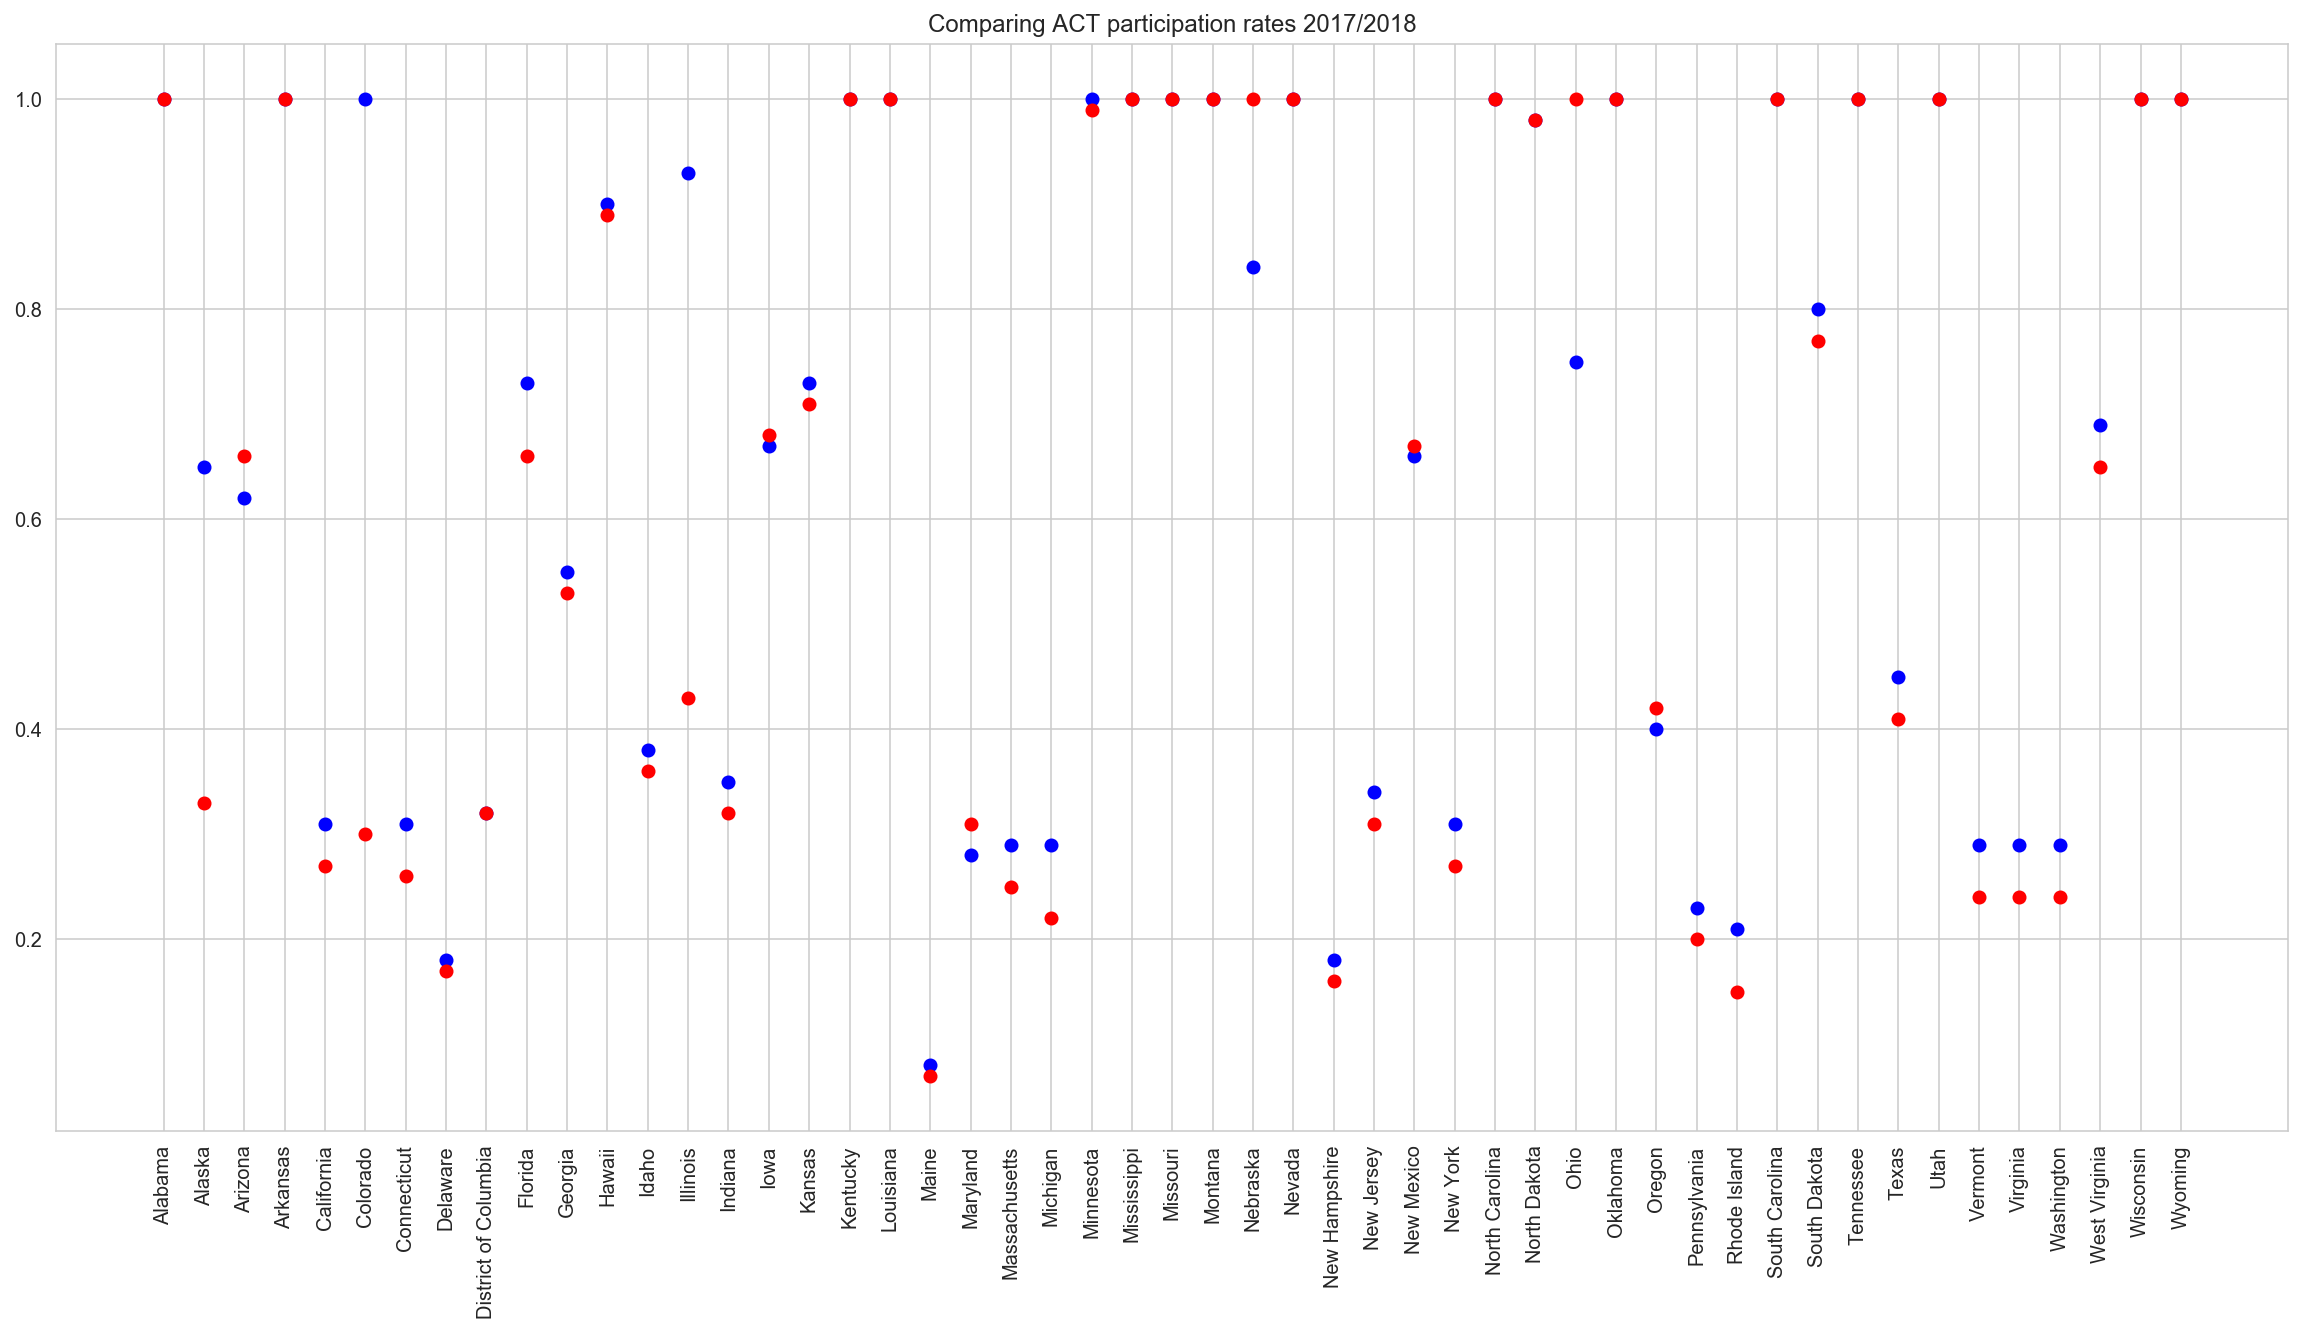

In [117]:
#plot scatter plot comparing SAT participation rates 
plt.figure(figsize=(20,10))
plt.scatter(state1,sevenact,c='blue')
plt.scatter(state1,eightact,c='red')
plt.xticks(rotation=90)
plt.title('Comparing ACT participation rates 2017/2018')
plt.show()

In [118]:
list_of_columns=['%_students_tested_sat_2017','total_2017']

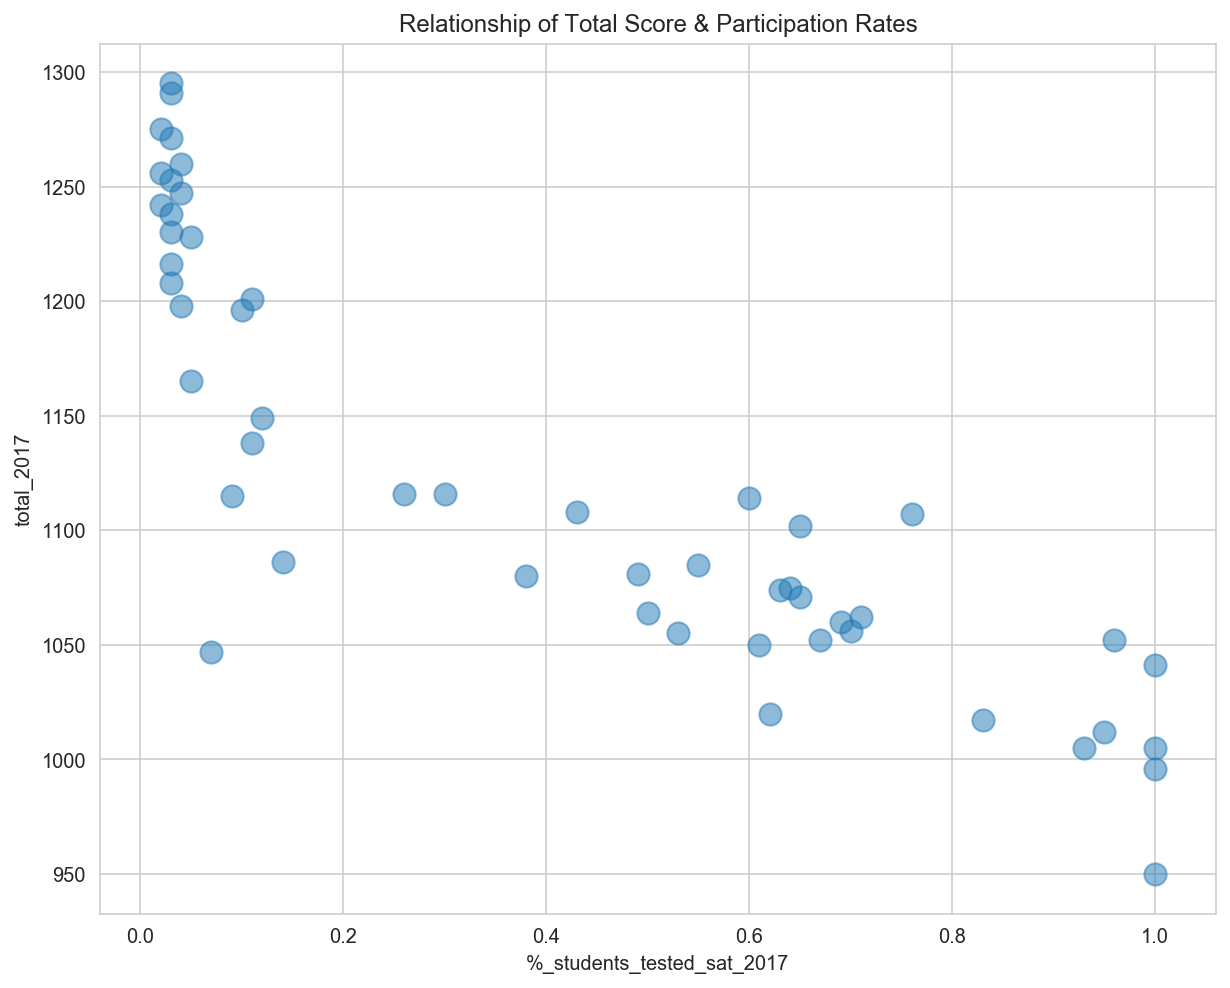

In [119]:
#plot scatter plot comparing SAT participation rates and total teet scores
subplot_scatterplots(final,list_of_columns,'Relationship of Total Score & Participation Rates')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [120]:
# Code You do this!!!
list_of_columns1=['math_2017','average_math_score_2017']
list_of_titles1=['2017 SAT Math scores','2017 ACT Math Scores']

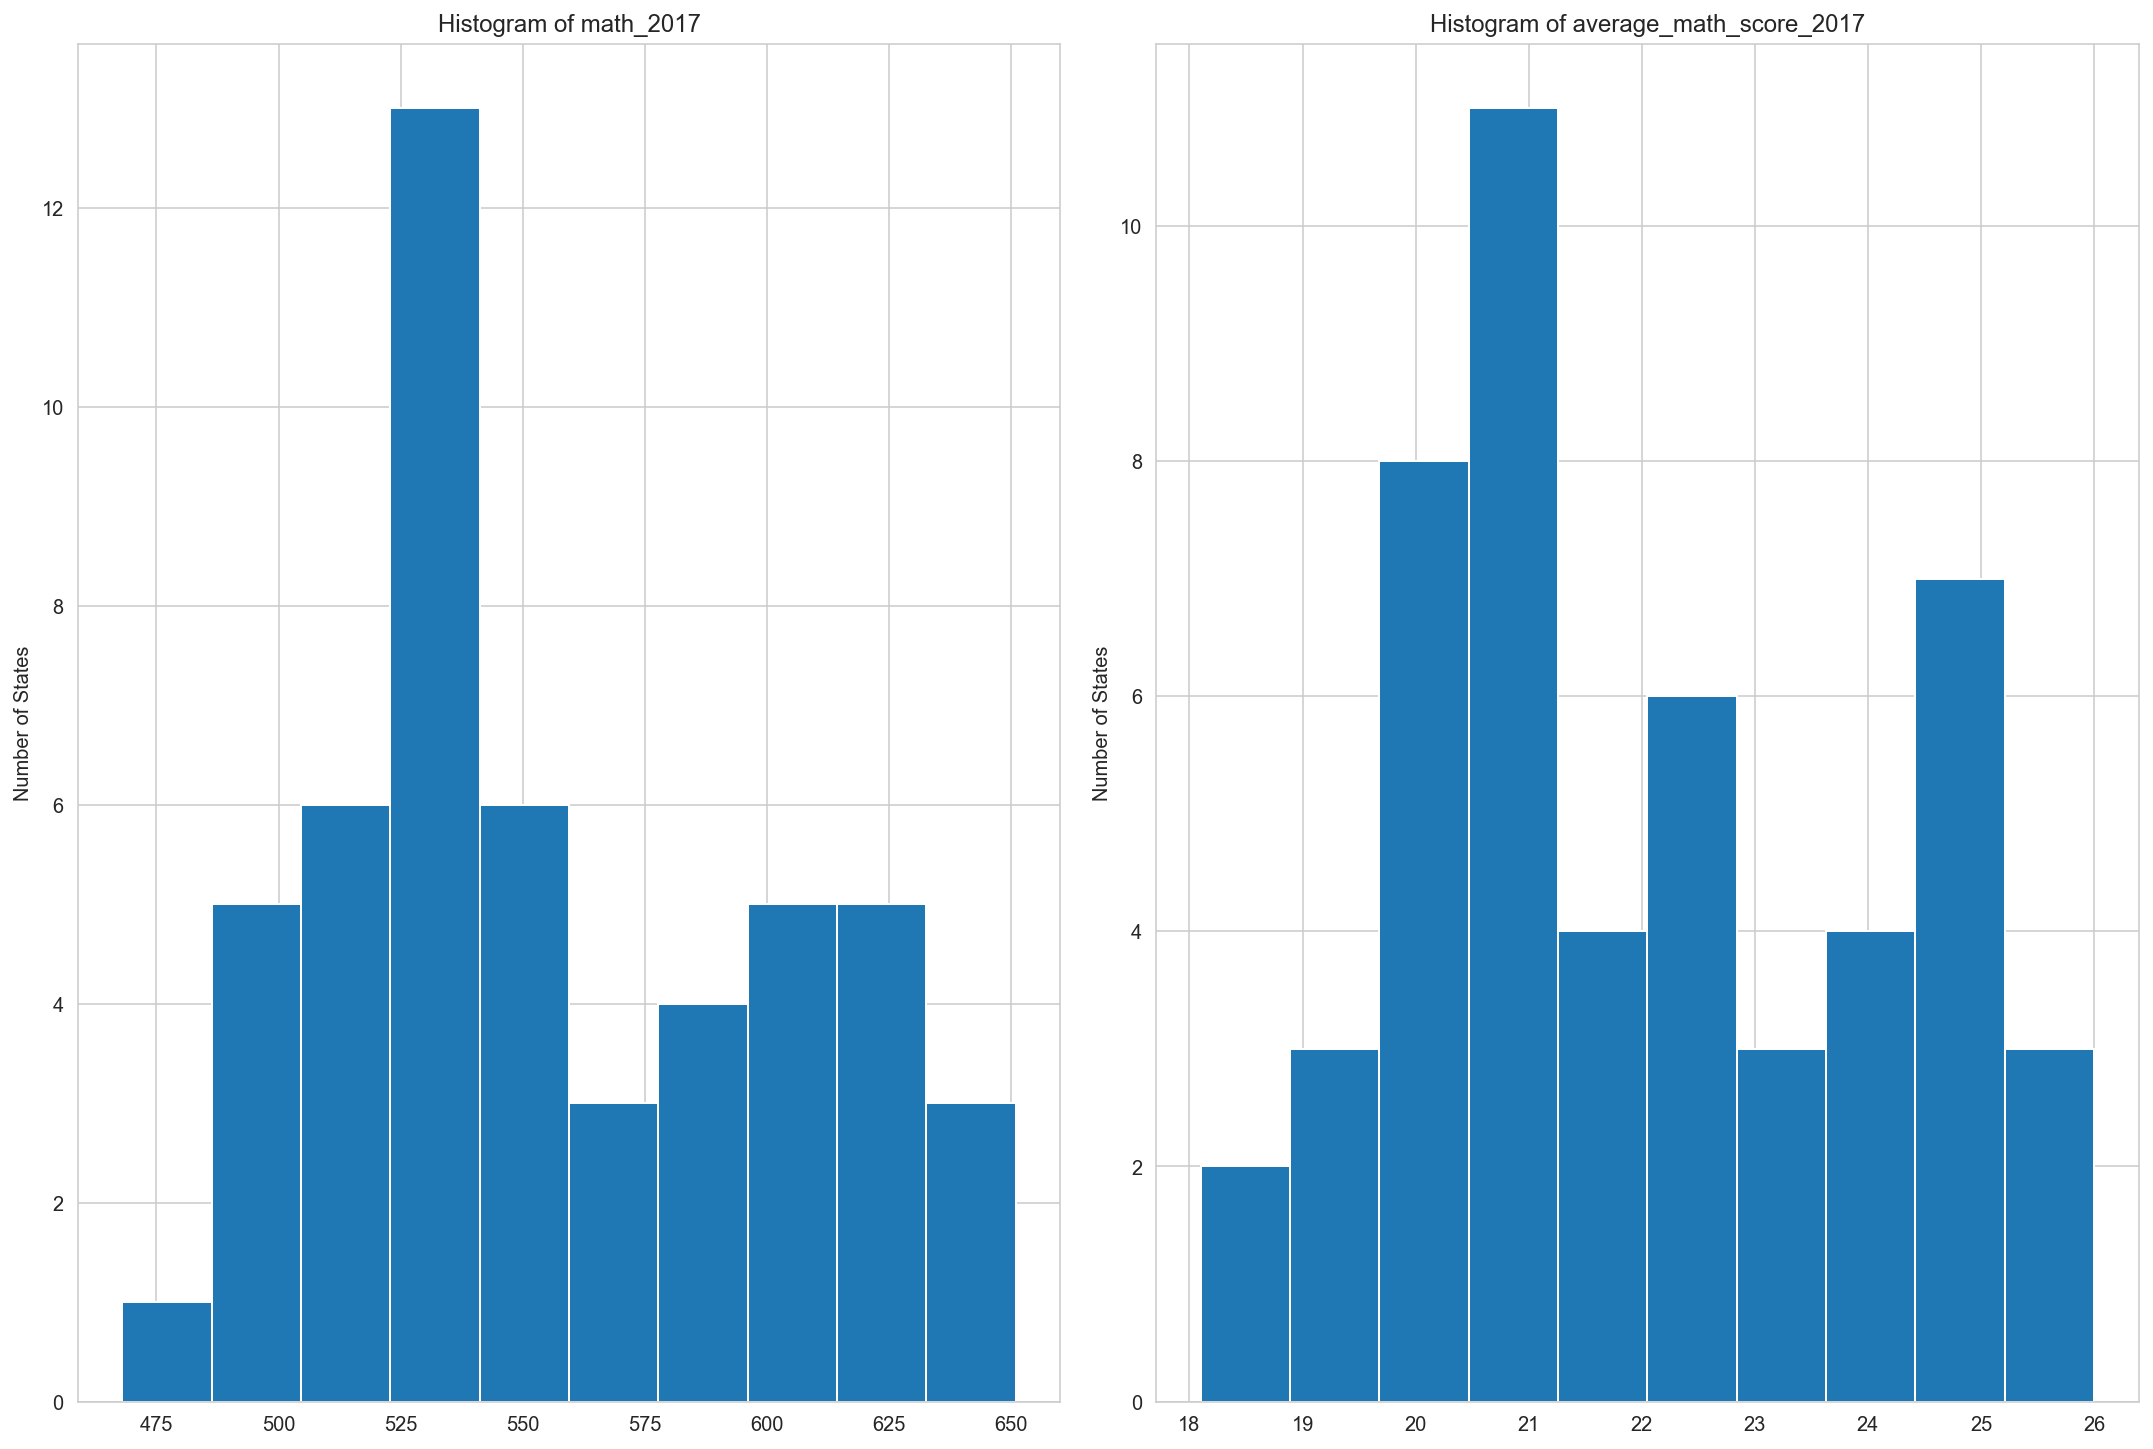

In [121]:
subplot_histograms(final,list_of_columns1,list_of_titles1)

In [122]:
list_of_columnsal=['evidence-based_reading_and_writing_2017','average_english_score_2017']
list_of_titlesal=['ERW_Scores_2017','English_Scores_2017']

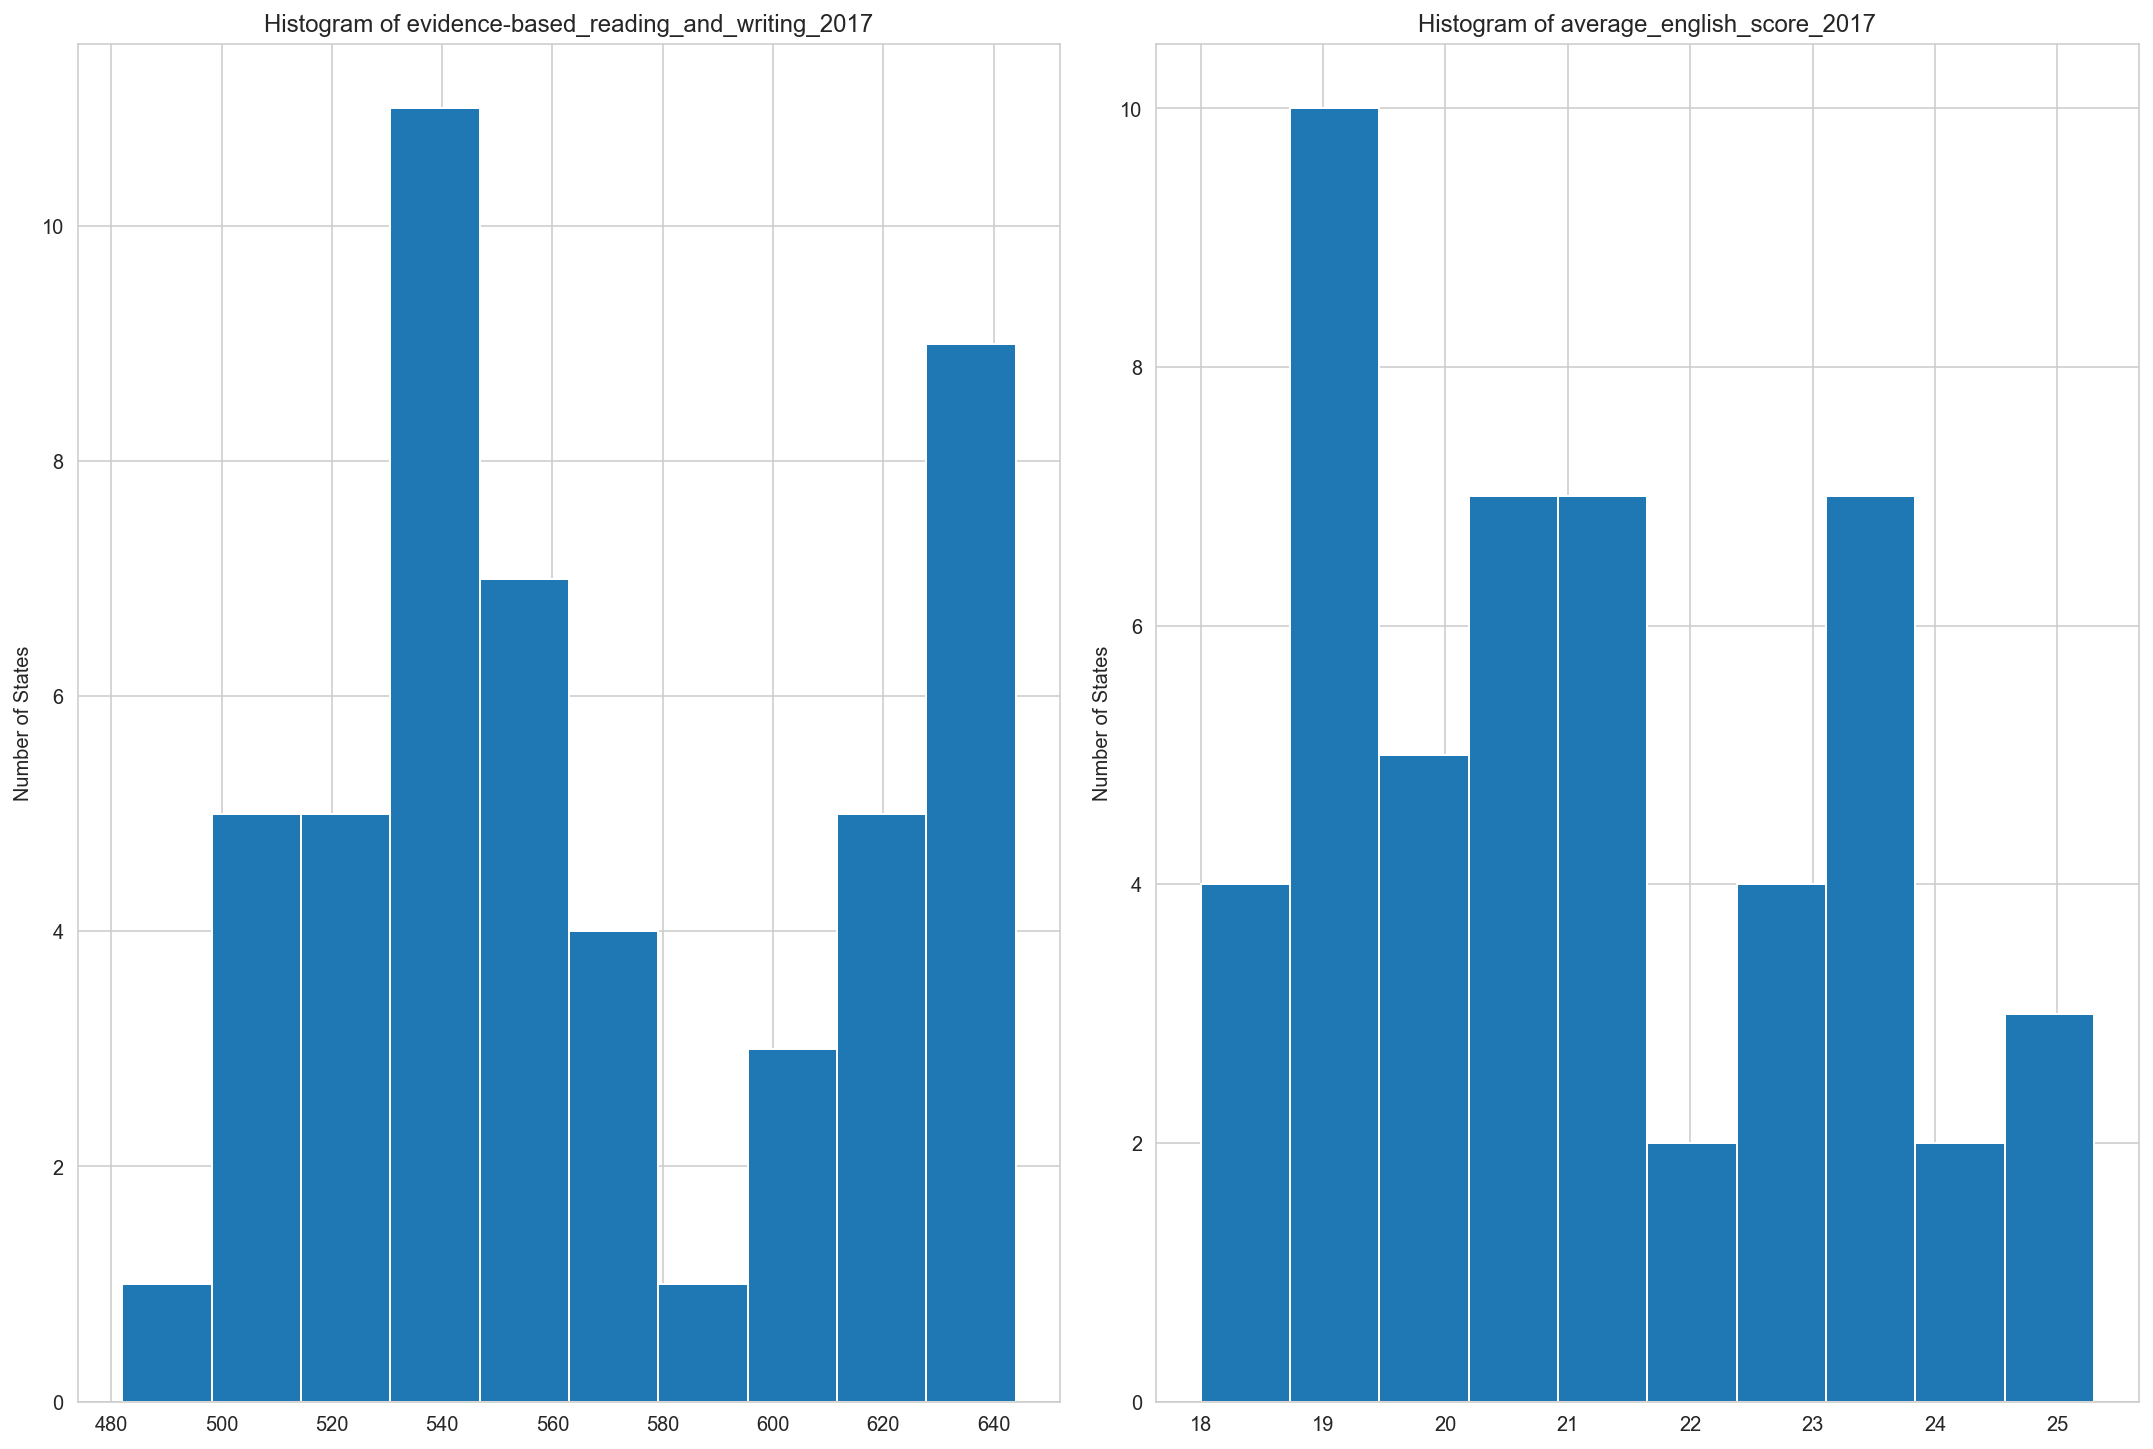

In [123]:
subplot_histograms(final,list_of_columnsal,list_of_titlesal)

Answer:
<br>As an example, above is the distribution for the SAT math and ACT math score. 
<br>There are three things that we lookin describing the distributions: 
<br>-shape of the distribution, 
<br>-spread of the distribution
<br>-central tendency of the distribution.
<br>Most of the distributions are normally distributed or even slightly positively skewed. If we took a look at the <br>mean and the median, we can see that most of the means are above the median of each categories. This supports the <br>shape of the distribution leaning towards positive skew.
<br>The standard deviations don’t seem to be too large which tells us that the spread is leaning towards more of the <br>tight end of distributions.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
<br>On one level, comparing the two alone shows us that they have a <br>negative realationship. A high participation of one test will be <br>accompanied by a low participation of the other. However that is the <br>only inference we can make with just those two.
<br>
<br>We want to know why such a relationship exists. From what we know SAT <br>tests are more language weighted, while the ACTs have a harder math <br>test. 
<br>A comparison of these scores would confirm this, and lead us to <br>understand the relationship.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: 
<br>In my opinion no.
<br>The standard of one test may not be of a similar level to the other.
<br>It is known that while the SATs are heavily weighted on the english and reading scores, 
<br>The ACTS tests the math language at a higher level then the math test in SATs.
<br>If we were to compare math scores, that could be a weighing mechanism added to the scores, 
<br>to account for the level of difficulty of the Math test, allowing us to compare both results much fairly


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states that I choose are West Virginia,Rhode Islands and Colorado for ACT participation. In both cases, the SAT <br>participation dropped in 2018.
<br>
<br>"In 2017-18, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode <br>Island, and West Virginia) and the District of Columbia covered the cost of the SAT for all their public school <br>students"
<br>-taken from SAT Scores Rise as Number of Test-Takers Tops 2 Million by Lauraine Genota
<br>
<br>As cost of taking the tests have been absorbed by the state, students could have been more inclined to take up <br>the SATs instead of paying to take the ACTs.
<br>This is in line with what we saw in that SAT participation in all 3 states increased in 2018.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on what we have done
<br>The key-takeaways.
<br>1. A state with low SAT participation rates will tend to have higher ACT participation rate. The reverse is also true.
<br>2. Students that tend to favour math and science are more inclined to do the ACTs, while those who are confident in language , tend to favour taking the SATs.
<br>3. For a state with a low participation rate, the average total score is higher then that of states with a high participation rate. This suggests that the students in this states are highly motivated, and have a career goal in mind, and are more inclined to take the sats
<br>4. The new SATs which has been recently introduced could be a deterring factor for students to take the SATs, as they might not be sure of the standards, and thus be unprepared to take the SATs
<br>
<br>My recommendations
<br>1. KOH should consider funding the SAT test to students just like a few of the other states in the country that have done so. This option, if it is not viable in the long run, can be done for the first 5-10 years, allowing students to familiarise and be comfortable with the new SAT standards.
<br>2. Setting up a careers/aspiration session made compulsory in each school. The idea is to get students to have a rough idea of what careers they want to pursue. Subsequently, they would have an idea of which colleges to apply for, and proceed to take the SATS to meet the criteria of those colleges.
<br>3. For the first few years, set up tuition classes, catered to help students familiarise themselves with the new SAT system. Additional more supplementarty language classes, to help students gain more confidence in attempting the language part of the SATs.
